# Análisis socioeducativo de los habitantes de la Ciudad de Buenos Aires

**Conformación del equipo**

* Lucía Hukovsky
* Juan Martín Carini
* Lucía Buzzeo
* José Saint Germain

# Presentación del problema y fuente de información

> ## Presentación del problema



Nos es de gran interés vivir en una comunidad con políticas públicas eficaces que mejoren las condiciones de vida de las personas. En este sentido, hemos decidido analizar los diferentes ejes que en nuestro país se rigen por políticas publicas. Al respecto, encontramos una gran limitación en el eje de educación al reconocer que su acceso dista de ser equitativo. Este aspecto no nos resultó una novedad, sin embargo, nos dio el pie para comenzar una investigación que permita dar una explicación teórica a la problemática. 
En concreto, nos ha permitido conocer mejor la situación educativa actual de CABA y descubrir las principales variables que afectan el nivel educativo.

El análisis realizado en el marco del presente proyecto podría establecer una base de requerimientos que permitan generar políticas públicas efectivas, no solo en el ámbito educativo, sino en el económico, cultural, social y geográfico, entre otros.

> ## Definición de la fuente de información

Para trabajar esta problemática, hemos decidido recurrir a la [Encuesta Anual de Hogares](https://www.estadisticaciudad.gob.ar/eyc/?page_id=702) del Gobierno de la Ciudad de Buenos Aires para el año 2019. El mismo está disponible en la base de [datos abiertos](https://data.buenosaires.gob.ar/dataset/encuesta-anual-hogares/resource/3a45c563-396d-42de-ba93-8a93729e0723) del GCBA.

Esta encuesta contiene información demográfica, social, económica, educativa y de salud de 14319 habitantes de la Ciudad, la cual es una muestra representativa que permite obtener un vistazo de la población de la Ciudad.

# Preguntas y objetivos de la investigación

En el presente proyecto se persigue el objetivo de descubrir las principales variables intervinientes en el nivel máximo educativo alcanzado por la población de la Ciudad Autónoma de Buenos Aires (CABA).
En concreto, con este proyecto se plantea el análisis de variables que podrían contribuir al nivel máximo educativo alcanzado por cada individuo en CABA. Las mismas se estudian tanto de forma independiente como entrelazadas.
El alcance de dicho objetivo permitiría identificar posibles causas que derivan en la desigualdad de acceso educativo, y, en última instancia, generar políticas públicas eficaces que permitan subsanar dicha problemática.

En concreto, se busca generar un modelo de predicción aplicado a nuestra variable target “Nivel Máximo
Educativo”, esto lo haremos implementando los siguientes modelos de clasificación:

*Arbol de decisión*: que construye un arbol durante el entrenamiento que es el que aplica a la hora de
realizar la predicción.

*Bosque Aleatorio*: que es un conjunto (ensemble) de árboles de decisión combinados con bagging.

A partir de la obtención del mejor arbol de decisión y el mejor bosque aleatorio tomaremos la decisión de cuál de los dos es el mejor algoritmo para lograr los objetivos de este trabajo.

# Orden de trabajo

Este trabajo se ha dividido en 3 partes:

1.   Introducción a las variables del problema: 
  Se ha realizado un análisis de las variables en donde se ha buscado conocer su performance dentro del datset y su potencial significancia para la pregunta que buscamos responder. A la vez, hemos investigado cómo las variables interactúan entre si. Esta parte es lo que se conoce como análisis univariado, bivariado y multivariado
2.   Modelos analíticos: 
  En esta sección se han llevado a cabo diversos modelos analíticos y algoritmos que han servido para acercarnos a la respuesta la pregunta que dio inicio a la presente investigación. Como nuestra variable objetivo es categórica vamos a realizar diversos modelos de clasificación.
3. Conclusión:
  Se han alcanzado conclusiones finales sobre los hallazgos. Además, se han discutido posibles limitaciones y se han planteado futuras líneas de análisis a partir del análisis presente. 



# Introducción a las variables: Análisis exploratorio de los datos


In [144]:
#Cargamos las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Lo primero que vamos a hacer es importar la base de datos y tener un vistazo general de las primeras filas del dataset.

In [145]:
#Cargamos el dataset con el que vamos a trabajar y le damos un vistazo
df = pd.read_csv("encuesta-anual-hogares-2019.csv",
                 encoding="latin1")
df.head()

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,...,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,hijos_nacidos_vivos,cantidad_hijos_nac_vivos
0,1,1,1,5,Resto de la Ciudad,18,Mujer,Jefe,Soltero/a,Padre no vive en el hogar,...,9000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,PBA excepto GBA,Solo obra social,No,No corresponde
1,1,1,2,5,Resto de la Ciudad,18,Mujer,Otro no familiar,Soltero/a,Padre no vive en el hogar,...,9000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,Otra provincia,Solo plan de medicina prepaga por contratación...,No,No corresponde
2,2,1,1,2,Resto de la Ciudad,18,Varon,Jefe,Soltero/a,Padre no vive en el hogar,...,33333,Asiste,Privado religioso,Universitario,Otras escuelas especiales,12,CABA,Solo plan de medicina prepaga por contratación...,NaN,No corresponde
3,2,1,2,2,Resto de la Ciudad,50,Mujer,Padre/Madre/Suegro/a,Viudo/a,No corresponde,...,33333,No asiste pero asistió,No corresponde,No corresponde,Secundario/medio comun,17,CABA,Solo prepaga o mutual via OS,Si,2
4,2,1,3,2,Resto de la Ciudad,17,Varon,Otro familiar,Soltero/a,Padre no vive en el hogar,...,33333,Asiste,Privado religioso,Secundario/medio comun,EGB (1° a 9° año),10,CABA,Solo plan de medicina prepaga por contratación...,NaN,No corresponde


Posteriormente vemos sus variables, el tipo que son (numéricas o de texto) y la cantidad de nulls que poseen.

In [146]:
#Miramos sus variable, el tipo que son y si tienen nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14319 entries, 0 to 14318
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           14319 non-null  int64 
 1   nhogar                       14319 non-null  int64 
 2   miembro                      14319 non-null  int64 
 3   comuna                       14319 non-null  int64 
 4   dominio                      14319 non-null  object
 5   edad                         14319 non-null  int64 
 6   sexo                         14319 non-null  object
 7   parentesco_jefe              14319 non-null  object
 8   situacion_conyugal           14318 non-null  object
 9   num_miembro_padre            14319 non-null  object
 10  num_miembro_madre            14319 non-null  object
 11  estado_ocupacional           14319 non-null  object
 12  cat_ocupacional              14319 non-null  object
 13  calidad_ingresos_lab         14

Generamos diversas transformaciones de variables, así como la creación de la variable "Target", pues es la que usaremos para todo el análisis:
 
* Creamos la variable "Target" y le asignamos la variable "nivel_max_educativo".
* En la variable "Target", reducimos su dimensionalidad intercambiando los valores:
    * "Secundario/medio comun" y "EGB (1° a 9° año)" por "sec_completo",
    * "Primario especial" y "Primario comun" por "prim_completo"
    * "Sala de 5" por "incial",
    * "Otras escuelas especiales" por "superior",
    * y por último a "No corresponde" por nulos. 
* Remplazamos los valores de años_escolaridad para que todos sean numéricos.
* En la variable "cantidad_hijos_nac_vivos" cambiamos el valor "no corresponde" como nulo, para luego cambiar el tipo de variable a entero.
* Las variables "comuna", "id", "nhogar" y "miembro" son de tipo numérico, pero deberían ser categóricas, por lo tanto transformamos su tipo a string.
* Por último renombramos algunas variables para que sean más cortas: 
    * "dominio_Villas de emergencia" por "dominio_villas",
    * "ingreso_per_capita_familiar" por "ing_per_cap_familiar",
    * "cantidad_hijos_nac_vivos" por "cant_hijos_nac_vivos".

In [147]:
#Creamos el target para nivel_max_educativo, reduciendo su dimensionalidad
df['Target'] = df['nivel_max_educativo']

df.loc[df['Target'].isin(['Secundario/medio comun','EGB (1° a 9° año)']),'Target'] = 'sec_completo'
df.loc[df['Target'].isin(['Primario especial','Primario comun']),'Target']         = 'prim_completo'
df.loc[df['Target']    == 'Sala de 5','Target']                                    = 'inicial'
df.loc[df['Target']    == 'Otras escuelas especiales','Target']                    = 'superior'
df.loc[df['Target'].isin(['No corresponde',np.nan]),'Target']                       = np.nan

#Remplazamos los valores de años_escolaridad para que todos sean numéricos
df.loc[df.años_escolaridad=="Ningun año de escolaridad aprobado","años_escolaridad"]=0
df["años_escolaridad"] = df["años_escolaridad"].astype('float')

#La variable "cantidad_hijos_nac_vivos" se puede pasar a numérica si se toma "no corresponde" como NAN.
df.loc[df.cantidad_hijos_nac_vivos=="No corresponde","cantidad_hijos_nac_vivos"]="0"
df["cantidad_hijos_nac_vivos"] = df["cantidad_hijos_nac_vivos"].apply(int)

#Hay determinadas variables (comuna,id,nhogar y miembro) que están como numéricas pero deberían ser categóricas.
df[["comuna","id","nhogar","miembro"]] = df[["comuna","id","nhogar","miembro"]].applymap(str)

# Por último renombramos algunas variables para que sean más cortas
df.rename(columns = {'dominio_Villas de emergencia': 'dominio_villas', 
                     'ingreso_per_capita_familiar': 'ing_per_cap_familiar',
                     "cantidad_hijos_nac_vivos" : "cant_hijos_nac_vivos"}, inplace = True)

Armamos un diccionario con las variables y etiquetas, esto nos va a servir para generar títulos en los gráficos:

* "id"                          : "Clave que identifica la vivienda",
* "nhogar"                      : "La variable id + nhogar = clave que identifica a cada hogar",
* "miembro"                     : "Variables id + nhogar + miembro = clave que identifica a cada persona",
* "comuna"                     : "Comuna donde reside la persona encuestada",
* "edad"                      : "Edad de la persona encuestada",
* "sexo"                        : "Sexo de la persona encuestada",
* "parentesco_jefe"             : "Parentesco entre la persona encuestada y el jefe de hogar",
* "situacion_conyugal"          : "Situación conyugal de la persona encuestada",
* "num_miembro_padre"           : "Número de miembro que corresponde al padre",
* "num_miembro_madre"           : "Número de miembro que corresponde a la madre",
* "estado_ocupacional"          : "Situación ocupacional de la persona encuestada",
* "cat_ocupacional"             : "Categoría ocupacional de la persona encuestada",
* "calidad_ingresos_lab"        : "Calidad de la declaración de ingresos laborales totales",
* "ingreso_total_lab"           : "Ingreso total laboral percibido el mes anterior",
* "calidad_ingresos_no_lab"     : "Calidad de la declaración de ingresos no laborales totales",
* "ingreso_total_no_lab"        : "Ingreso total no laboral percibido el mes anterior",
* "calidad_ingresos_totales"    : "Calidad de ingresos totales individuales",
* "ingresos_totales"            : "Ingreso total individual percibido el mes anterior",
* "calidad_ingresos_familiares" : "Calidad de ingresos totales familiares",
* "ingresos_familiares"         : "Ingresos totales familiares percibido el mes anterior",
* "ing_per_cap_familiar"        : "Ingreso familiar per capita percibido el mes anterior",
* "estado_educativo"            : "Asistencia (pasada o presente) o no a algún establecimiento educativo",
* "sector_educativo"            : "Sector al que pertenece el establecimiento educativo al que asiste",
* "nivel_actual"                : "Nivel cursado al momento de la encuesta",
* "nivel_max_educativo"         : "Máximo nivel educativo que se cursó",
* "años_escolaridad"            : "Años de escolaridad alcanzados",
* "lugar_nacimiento"            : "Lugar de nacimiento de la persona encuestada",
* "afiliacion_salud"            : "Afiliación de salud de la persona encuestada",
* "hijos_nacidos_vivos"         : "Tiene o tuvo hijos nacidos vivos",
* "cant_hijos_nac_vivos'        : "Cantidad de hijos nacidos vivos",
* "dominio"                     : "¿la vivienda se ubica en una villa de emergencia?",
* "Target"                      : "Nivel máximo educativo".

In [148]:
#Armamos un diccionario con las variables y etiquetas, esto nos va a servir para generar títulos en los gráficos
etiquetas = {
    'id'                          : 'Clave que identifica la vivienda',
    'nhogar'                      : 'La variable id + nhogar = clave que identifica a cada hogar',
    'miembro'                     : 'Variables id + nhogar + miembro = clave que identifica a cada persona',
    'comuna'                      : 'Comuna donde reside la persona encuestada',
    'edad'                        : 'Edad de la persona encuestada',
    'sexo'                        : 'Sexo de la persona encuestada',
    'parentesco_jefe'             : 'Parentesco entre la persona encuestada y el jefe de hogar',
    'situacion_conyugal'          : 'Situación conyugal de la persona encuestada',
    'num_miembro_padre'           : 'Número de miembro que corresponde al padre',
    'num_miembro_madre'           : 'Número de miembro que corresponde a la madre',
    'estado_ocupacional'          : 'Situación ocupacional de la persona encuestada',
    'cat_ocupacional'             : 'Categoría ocupacional de la persona encuestada',
    'calidad_ingresos_lab'        : 'Calidad de la declaración de ingresos laborales totales',
    'ingreso_total_lab'           : 'Ingreso total laboral percibido el mes anterior', 
    'calidad_ingresos_no_lab'     : 'Calidad de la declaración de ingresos no laborales totales', 
    'ingreso_total_no_lab'        : 'Ingreso total no laboral percibido el mes anterior',
    'calidad_ingresos_totales'    : 'Calidad de ingresos totales individuales', 
    'ingresos_totales'            : 'Ingreso total individual percibido el mes anterior',
    'calidad_ingresos_familiares' : 'Calidad de ingresos totales familiares',
    'ingresos_familiares'         : 'Ingresos totales familiares percibido el mes anterior',
    'ing_per_cap_familiar'        : 'Ingreso familiar per capita percibido el mes anterior', 
    'estado_educativo'            : 'Asistencia (pasada o presente) o no a algún establecimiento educativo', 
    'sector_educativo'            : 'Sector al que pertenece el establecimiento educativo al que asiste',
    'nivel_actual'                : 'Nivel cursado al momento de la encuesta',
    'nivel_max_educativo'         : 'Máximo nivel educativo que se cursó',
    'años_escolaridad'            : 'Años de escolaridad alcanzados',
    'lugar_nacimiento'            : 'Lugar de nacimiento de la persona encuestada',
    'afiliacion_salud'            : 'Afiliación de salud de la persona encuestada',
    'hijos_nacidos_vivos'         : 'Tiene o tuvo hijos nacidos vivos',
    'cant_hijos_nac_vivos'        : 'Cantidad de hijos nacidos vivos',
    'dominio'                     : '¿la vivienda se ubica en una villa de emergencia?',
    'Target'                      : 'Nivel máximo educativo'
    }

Comenzamos analizando el dataset en su conjunto, comenzando por la cantidad de filas y columnas que posee:

In [149]:
print(f'\tEl dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas. \n')

	El dataset tiene 14319 filas y 32 columnas. 



Para observar los nulos de una manera diferente, vamos a graficar los mismos para tener un pantallazo de los mismos.

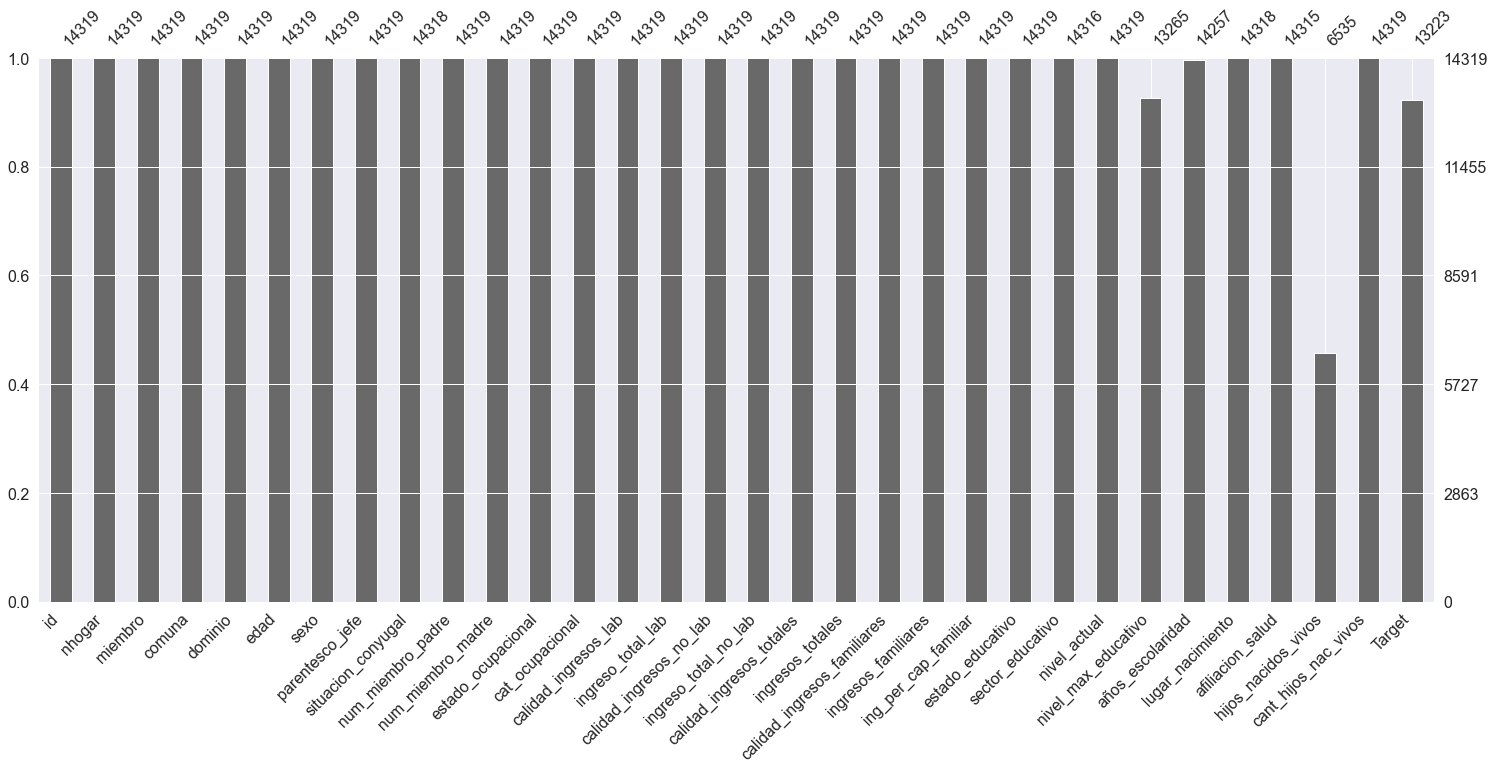

In [150]:
import missingno as msno

fig, axes = plt.subplots(figsize=(10,5))

msno.bar(df);

fig.savefig('Informe/Imagenes/NullsDS.png', bbox_inches='tight')

De este gráfico podemos saber a simple vista que las variables "nivel_max_educativo" (y nuestra copia, "Target") e "hijos_nacidos_vivos" tienen la mayor cantidad de valores nulos.

Ahora vamos a construir una tabla resumen con varias estadísticas descriptivas para cada una de las variables, así como con una breve descripción de lo que significa cada una de ellas.

In [151]:
# Tomamos el código visto en clase para tener un vistazo de las diversas medidas estadísticas de cada variable
from pandas.api.types import is_numeric_dtype
import numpy as np

def univariado_info(df):
  '''Calculo de información estadísticas y genéricas de cada columna de un dataframe'''

  #Creamos un dataframe con columnas especificas:

  df_info = pd.DataFrame(columns=['Cantidad', 'Tipo' , 'Missing', 'Únicos', 'Numeric'])
  #loop de todas las variables del dataframe
  for col in df:

      #obtengo info de la columna
      data_series = df[col]
      #lleno dataframe con las columnas iniciales
      df_info.loc[col] = [data_series.count(), data_series.dtype, data_series.isnull().sum(), data_series.nunique(), is_numeric_dtype(data_series)]

  #calculo el describe 
  df_describe = df.describe(include='all').T[['top', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
  #calculo sesgo y curtosis
  df_stats = pd.DataFrame([df.skew(), df.kurtosis()], index=['sesgo', 'kurt']).T

  return pd.concat([pd.Series(etiquetas,name='Etiqueta'),pd.concat([df_info,df_describe, df_stats], axis=1)], axis=1).fillna('-')


df_uni_stats = univariado_info(df).reset_index()
df_uni_stats.set_index(df_uni_stats['index'],inplace=True)
df_uni_stats.drop(['index'],axis=1,inplace=True)
# df_uni_stats.rename(index={'index':'variable'},inplace=True)
df_uni_stats

C:\Users\JMC\AppData\Local\Temp\ipykernel_43988\1843799108.py:22: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_stats = pd.DataFrame([df.skew(), df.kurtosis()], index=['sesgo', 'kurt']).T


,Etiqueta,Cantidad,Tipo,Missing,Únicos,Numeric,top,mean,std,min,25%,50%,75%,max,sesgo,kurt
index,,,,,,,,,,,,,,,,
id,Clave que identifica la vivienda,14319,object,0,5795,False,4291,-,-,-,-,-,-,-,0.16901,-0.953158
nhogar,La variable id + nhogar = clave que identifica...,14319,object,0,7,False,1,-,-,-,-,-,-,-,21.366705,687.880709
miembro,Variables id + nhogar + miembro = clave que id...,14319,object,0,19,False,1,-,-,-,-,-,-,-,1.940715,8.605228
comuna,Comuna donde reside la persona encuestada,14319,object,0,15,False,8,-,-,-,-,-,-,-,0.103211,-1.090936
edad,Edad de la persona encuestada,14319,int64,0,101,True,-,38.81549,23.11017,0.0,20.0,37.0,57.0,100.0,0.249452,-0.868539
sexo,Sexo de la persona encuestada,14319,object,0,2,False,Mujer,-,-,-,-,-,-,-,-,-
parentesco_jefe,Parentesco entre la persona encuestada y el je...,14319,object,0,9,False,Jefe,-,-,-,-,-,-,-,-,-
situacion_conyugal,Situación conyugal de la persona encuestada,14318,object,1,7,False,Soltero/a,-,-,-,-,-,-,-,-,-
num_miembro_padre,Número de miembro que corresponde al padre,14319,object,0,9,False,No corresponde,-,-,-,-,-,-,-,-,-


Detectamos que nuestra variable target tiene 1054 valores nulos. Es importante tener este dato presente cuando querramos correr un algoritmo de clasificación.

## Análisis univariado

### Género y edad

Comenzamos con un pantallazo general sobre las primeras cualidades de los datos, 
como muestra representativa para la EPH, sobre quiénes son los ciudadanos representado en el dataset.

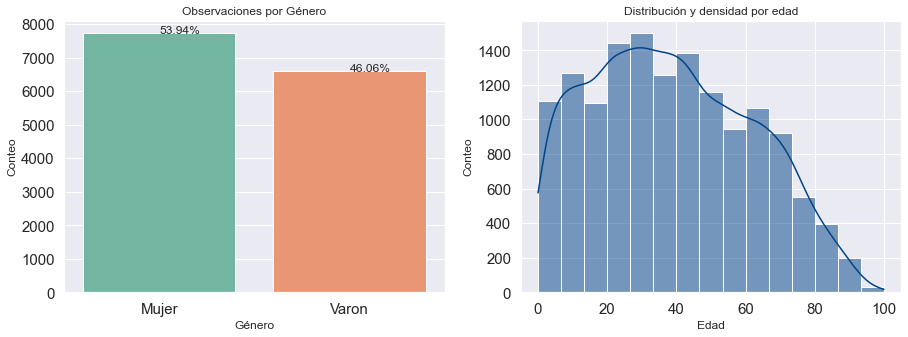

In [152]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sex = df['sexo']
edad = df['edad']

sns.countplot(x=sex, ax=axes[0], palette = 'Set2').set(title='Observaciones por Género', xlabel='Género', ylabel='Conteo')

#Agrego los valores porcentuales de la variable sexo
for n,i in enumerate(['Mujer','Varon']):
  porc = df['sexo'].value_counts(normalize=True)[i]*100
  axes[0].text(n,df['sexo'].value_counts(normalize=False).round(2)[i],porc.round(2).astype(str)+'%')

sns.histplot(x=edad,
            ax=axes[1],
            color='#004488',
            bins= 'sturges',
            kde=True).set(title='Distribución y densidad por edad', xlabel='Edad', ylabel='Conteo')

for i in [0,1]:
  axes[i].tick_params(axis='both',
               labelsize=15
               )


fig.savefig('Informe/Imagenes/AUGenero.png');

En la variable género los datos parecen equilibrados en las categorías. Para el caso de la variable "edad", la distribución se asemeja a la de una normal.

### Comuna

Seguimos observando la variable "comuna". En la misma se muestra la comuna de la Ciudad de Buenos Aires del entrevistado, de manera de tener una ubicación geográfica. Consideramos importante revisar esta variable ya que tenemos como hipótesis que el nivel educativo alcanzado puede estar dependiendo de la zona geográfica de la ciudad en la que se encuentra el entrevistado.

In [153]:
#instalamos geopandas para trabajar con mapas
%pip install geopandas

Note: you may need to restart the kernel to use updated packages.


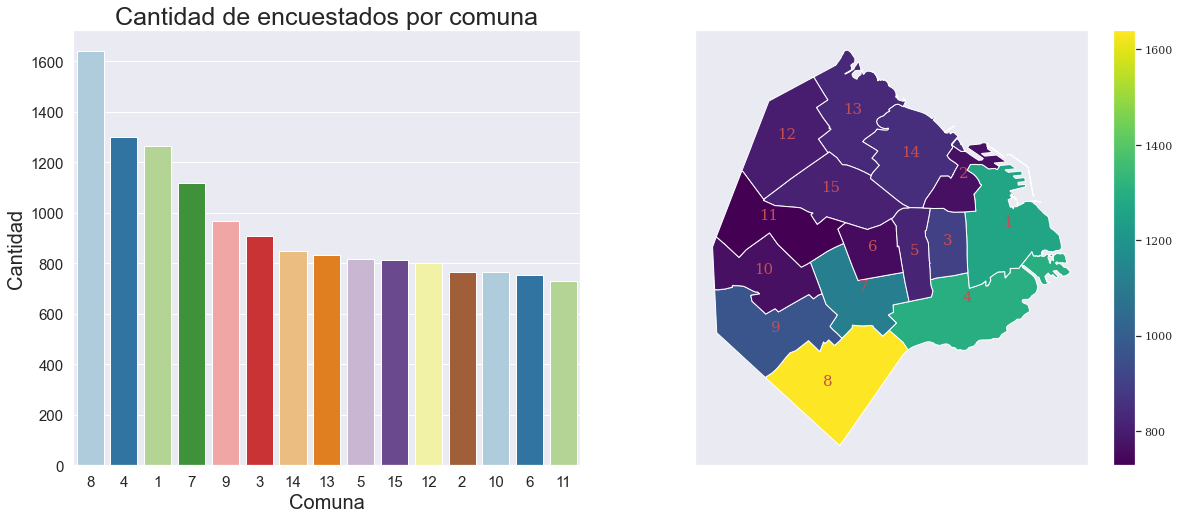

In [154]:
from cgitb import text
from tkinter import font
import geopandas as gpd
#Vamos a generar un mapa, así que vamos a importar el mapa de comunas de la Ciudad de Buenos Aires
comunas = gpd.read_file("comunas.geojson")

#Transformamos las variables que vamos a usar para joinear el mapa con la base de manera que coincidan
comunas["COMUNAS"] = comunas["COMUNAS"].apply(int).apply(str)

# Transformamos la base para contabilizar la frecuencia con la que aparece cada comuna en la base
com = pd.DataFrame(df["comuna"].value_counts()).reset_index()

# Unimos ambos datasets
df_com = gpd.GeoDataFrame(pd.merge(com,comunas[["COMUNAS","geometry"]],left_on="index",right_on="COMUNAS"))

#generamos el lienzo
fig , ax = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(20,8))
plt.rcParams.update({"font.size":9,"axes.titlesize":25,"axes.labelsize":15, 'font.family':'serif'})

#mapa
df_com[["comuna","geometry"]].plot(ax= ax[1],column="comuna",legend=True,cmap="viridis",
           legend_kwds={'label': ""})
#agrego un gráfico de barras
sns.barplot(data=df_com, x="COMUNAS", y='comuna', color='COMUNAS', palette='Paired', ax=ax[0])

#genero una nueva variable con las coordenadas para poder agregar etiquetas en el centro geográfico de cada comuna
df_com['coords'] = df_com['geometry'].apply(lambda x: x.representative_point().coords[:])
df_com['coords'] = [coords[0] for coords in df_com['coords']]

for idx, row in df_com.iterrows():
    plt.annotate(row['COMUNAS'], xy=row['coords'],horizontalalignment='center',size=15,color="r")

#Título y etiquetas de variables    
ax[0].set_title("Cantidad de encuestados por comuna", fontsize=25)
ax[0].set_ylabel("Cantidad", fontsize=20)
ax[0].set_xlabel("Comuna", fontsize=20)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)

ax[0].tick_params(axis='both',
               labelsize=15
               )

fig.savefig('Informe/Imagenes/AUComuna.png');

Observando los dos gráficos generados vemos que las comunas 1,4,7 y 8 tienen mayor cantidad de casos. Queda por verse si en posteriores análisis es necesario abordar esta diferencia para evitar sesgos. Para eso, será necesario tomar en cuenta el porcentaje de la población total de cada comuna.

### Ingreso familiar per capita

Ahora probamos con observar los ingresos familiares. Creemos que puede ser un indicador interesante del nivel educativo.

In [155]:
#Armamos una función para graficar y jugar con el nivel del filtrado de la variable y obtener un histograma
#que permita apreciar mejor la distribución de la variable sin tantos outliers
def hist_box(DataFrame, #dataset
             x, #variable del gráfico
             limite,# frecuencia del rango para la etiqueta del eje x
             bins): 
  #sns.set(style="white", rc={"lines.linewidth": 2, "font.size":9,
  #                           "axes.titlesize":20,"axes.labelsize":17, 'font.family':'serif'})
  fig, ax = plt.subplots(figsize=(20,10),nrows=2,ncols=1,sharex=True)
  sns.histplot(x=x,
              data=df[df[x]<limite] ,
              color='#004488',
              ax=ax[1],
              bins= bins,
              kde=True)
  
  ax[0].boxplot(x=df[df[x]<limite][x],vert=False)
  ax[0].set_title(f"{etiquetas[x]} menor a {limite}",size=25)
  ax[1].set_title("")
  ax[0].set(xticks=range(0,limite+1,int(limite/20)))
  
  for i in [0,1]:
    ax[i].tick_params(axis='both',
               labelsize=15
               )
  fig.savefig('Informe/Imagenes/AUIngFam.png')

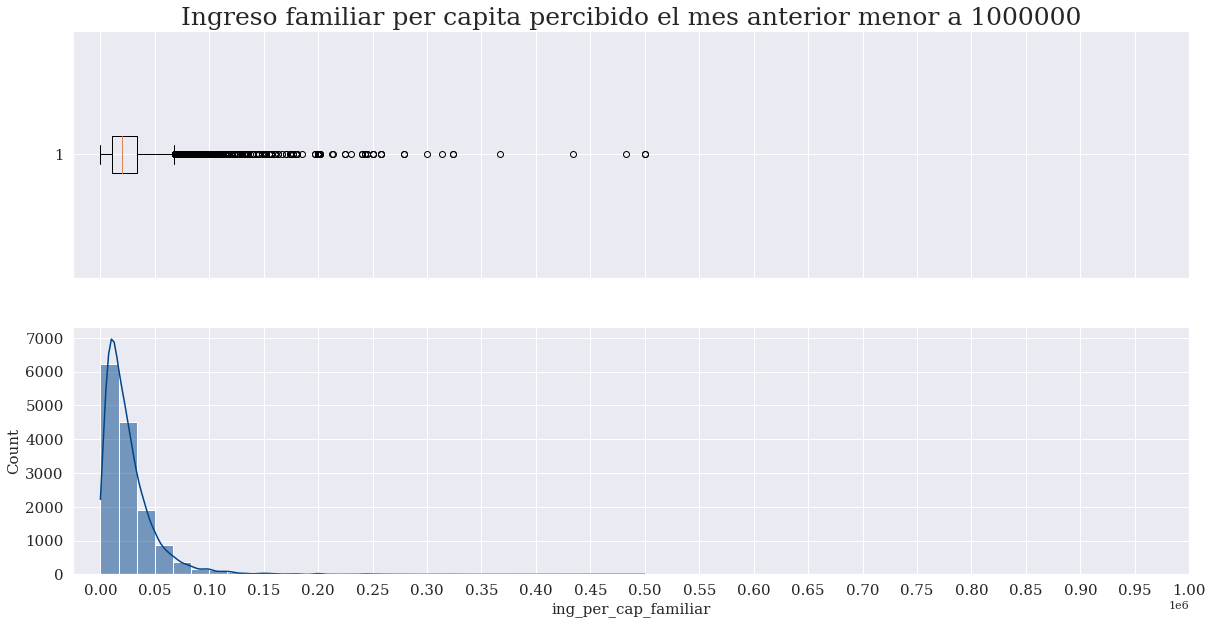

In [156]:
#probamos graficando con el máximo de la variable
hist_box(df,'ing_per_cap_familiar',max(df.ing_per_cap_familiar),bins=30);

Como hay muchos outliers que impiden ver la distribución correctamente, los quitamos de los gráficos.

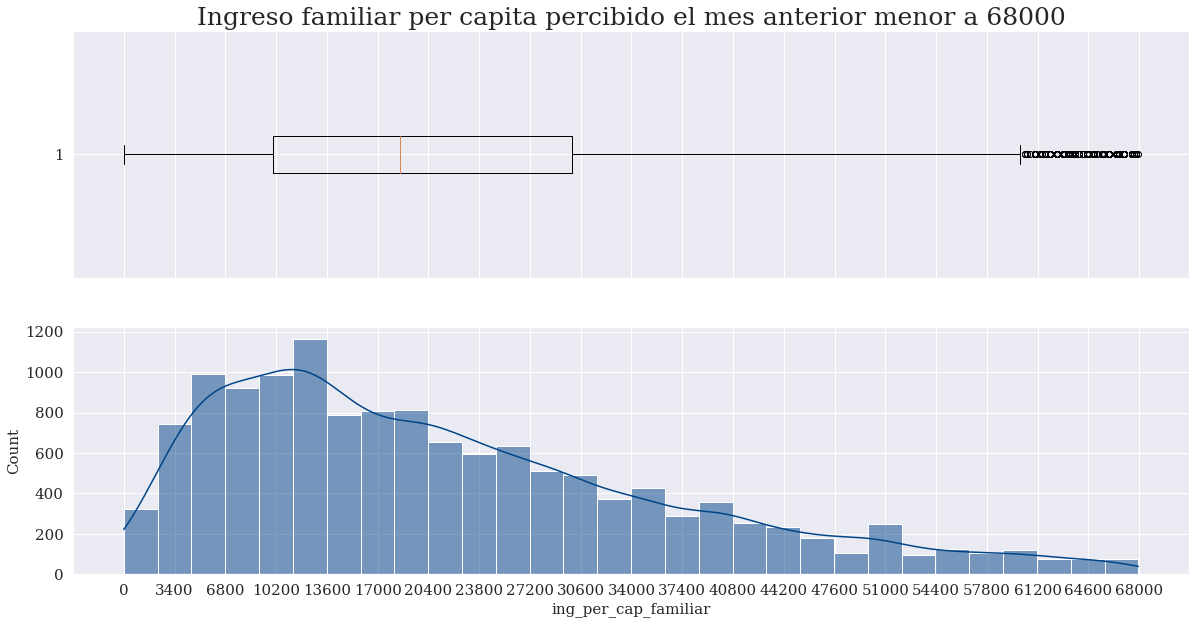

In [157]:
#Ahora probamos quitando los outliers
r75 = int(df.describe()["ing_per_cap_familiar"]["75%"]) #tercer cuartil
r25 = int(df.describe()["ing_per_cap_familiar"]["25%"]) #segundo cuartil

O = r75 + 1.5 * (r75-r25) #calculamos el límite inferior a los outliers
hist_box(df,"ing_per_cap_familiar",int(O),bins=30)

De este forma vemos que, aún removiendo los outliers, la distribución sigue sesgada.

### Años de escolaridad

Ahora nos enfocamos en analizar los años de escolaridad de los encuestados. Es importante tener presente esta variable en el futuro puesto que es muy probable que correlacione positivamente con nuestro target. 

Comenzamos observando algunas estadísticas descriptivas, sumando para ello un histogramas a nuestro análisis:

In [158]:
# Texto de título predeterminado
df.describe()[["años_escolaridad"]].T

,count,mean,std,min,25%,50%,75%,max
años_escolaridad,14257.0,10.907905,5.353943,0.0,7.0,12.0,15.0,19.0


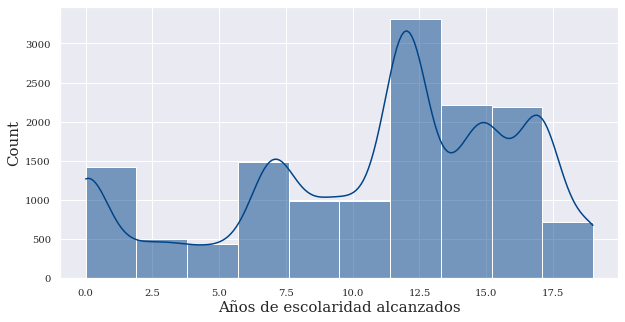

In [159]:
fig = plt.figure(figsize=(10,5))
sns.histplot(x="años_escolaridad",data=df,
             color='#004488',bins= 10,
             kde=True).set_xlabel(etiquetas["años_escolaridad"])
plt.tick_params(axis='both',
               labelsize=10
               )
fig.savefig('Informe/Imagenes/AUAnosEsc.png');

A simple vista se observan tres "picos": en el valor mínimo, alrededor del 7.5 y alrededor del 12.5. Podemos inferir que estos tres casos corresponden a no tener estudios, solo haber transcurrido el primario y haber transcurrido hasta la educación secundaria, respectivamente.

### Máximo nivel educativo (Target)

Nos avocamos a analizar nuestro target, para eso vamos a tomar en cuenta su frecuencia absoluta así como su frecuencia relativa.

In [160]:
def freq_table(df, col):

  # Selección de data
  data = df[col]

  # Verificación de columna y si queremos cortes de intervalos
  if not is_numeric_dtype(data):
  #or not with_cuts:
    # Generación de tabla de frecuencia ,con info absoluta
    freq_tab = pd.crosstab(data, columns='FreqAbs').sort_values('FreqAbs', ascending=False)
   
  #calculo del resto de la tabla de frecuencia
  freq_tab['FreqRel'] = freq_tab['FreqAbs'] / freq_tab['FreqAbs'].sum()
  freq_tab[['FAbsAcumulada', 'FAbsRelativa']] = freq_tab[['FreqAbs','FreqRel']].cumsum()
  return freq_tab

c:\Users\JMC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


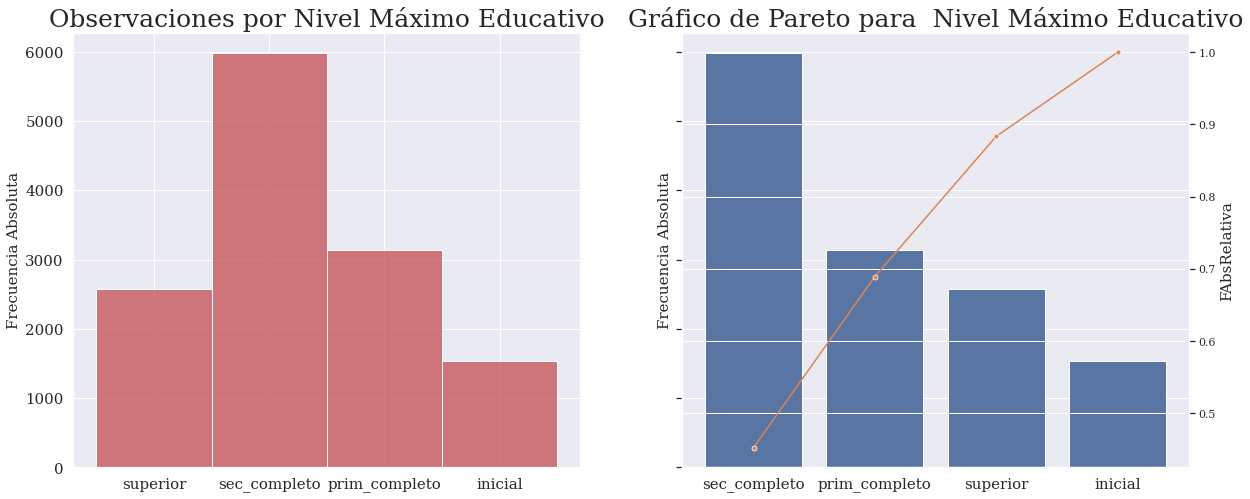

In [161]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8), sharey=True);


sns.histplot(x=df['Target'], ax=axes[0], 
             color = 'C3').set(title='Observaciones por Nivel Máximo Educativo', 
                               xlabel='',
                               ylabel='Frecuencia Absoluta');

nivel  = freq_table(df, 'Target').reset_index().sort_values('FreqAbs', ascending=False);

sns.barplot(data=nivel, x='Target', y='FreqAbs', ax=axes[1], 
            color="C0").set(title='Gráfico de Pareto para  Nivel Máximo Educativo', 
                            xlabel='',
                            ylabel='Frecuencia Absoluta');
ax2 = axes[1].twinx();

for i in [0,1]:
    axes[i].tick_params(axis='both',
               labelsize=15
               )
               
sns.lineplot(nivel['Target'], nivel["FAbsRelativa"], color="C1", marker="o", ms=5, ax=ax2)
fig.savefig('Informe/Imagenes/AUTarget.png');

Podemos observar que el nivel máximo educativo más alcanzado es el secundario completo, seguido por el primario. Contrario de lo que habíamos intuido anteriormente, el nivel superior quedó en tercer lugar. 
Adicionalmente, el nivel secundario y primario explican casi el 77% de los datos.

## Análisis bivariado

Para comenzar el análisis bivariado del problema, realizamos diferentes heatmaps para ver si algo nos llama la atención entre las variables numéricas.

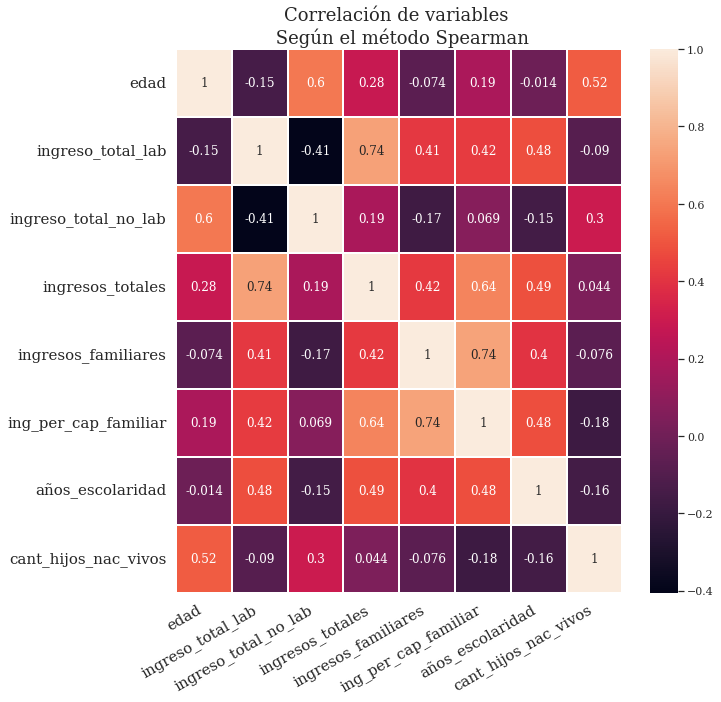

In [200]:
#generación de los gráficos de correlación con el método Spearman
fig = plt.figure(figsize=(10,10))
plt.rcParams.update({"font.size":12,"axes.titlesize":20,"axes.labelsize":15, 'font.family':'serif'})
correlation = df.dropna().corr(method="spearman")
high_corr=correlation[correlation>=0.0]
sns.heatmap(correlation, linewidth = 2, annot=True)
plt.title("Correlación de variables \n Según el método Spearman", fontsize=18)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=30,  ha='right')

fig.savefig('Informe/Imagenes/ABSpearman.png', bbox_inches='tight');

A simple vista, no se observan fuertes correlaciones.

Podemos notar que la variable "años_escolaridad" correlaciona moderadamente bien con variables relacionadas al ingreso. 
La principal correlación positiva es "años_escolaridad" con ingreso familiar per cápita ("ing_per_cap_familiar"), lo cual hace sentido teórico.

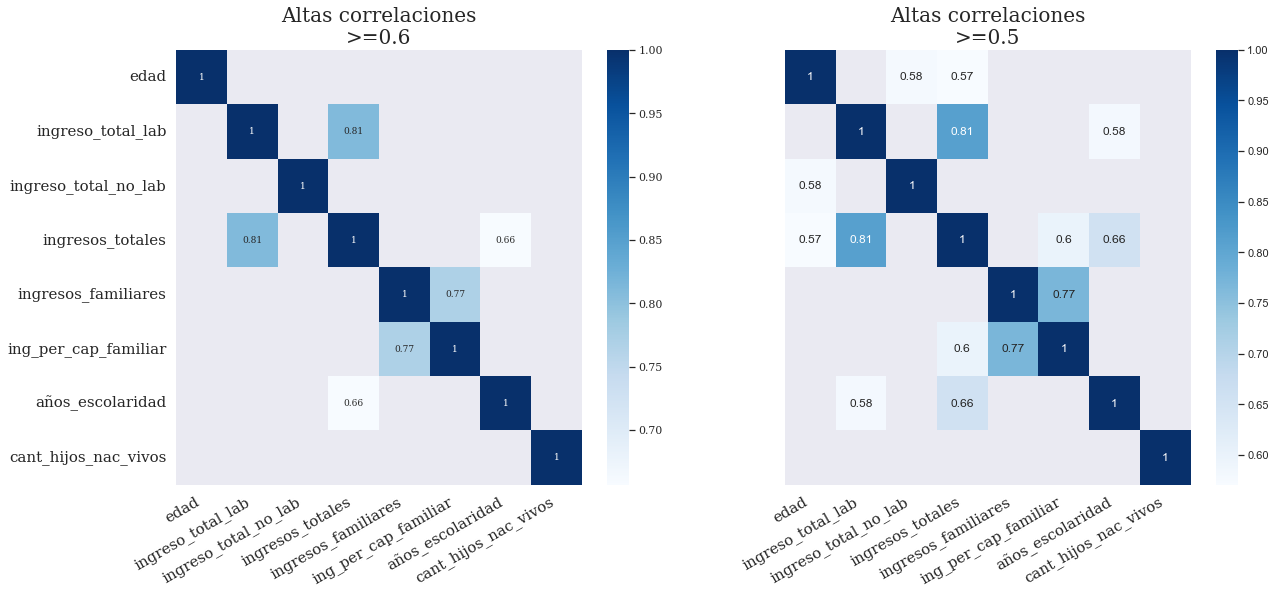

<Figure size 720x864 with 0 Axes>

<Figure size 720x864 with 0 Axes>

In [163]:
# Método para solo graficar en base a un threshold
lista=[.6,.5] # Treshold de los gráficos (si se quieren agregar más gráficos se puede hacer agregando tresholds a la lista)

fig , ax = plt.subplots(figsize=(20,8), ncols=len(lista), sharey=True, sharex=False)
mat_corr_spearman = df.corr('spearman')

for n,i in enumerate(lista):
  high_corr = mat_corr_spearman[mat_corr_spearman>=i]
  plt.figure(figsize=(10,12))
  sns.heatmap(high_corr, cmap="Blues",ax=ax[n], annot=True)
  ax[n].set_title('Altas correlaciones\n>='+str(i),size=20)
  sns.set(font_scale=1)
  ax[n].set_xticklabels(high_corr,rotation=30, ha='right', minor=False)
  ax[n].tick_params(axis='both',
               labelsize=15
               )
fig.savefig('Informe/Imagenes/ABThreshold.png', bbox_inches='tight');
  

Aquí, vemos que los años de escolaridad alcanzados por los entrevistados tienen algo relación (0.66) con la variable "ingresos_totales".

Por último corremos una tabla de correlación y filtramos las de valores más altos

In [164]:
def corrFilter(x: pd.DataFrame, thres: float):
    #generate corr 
    xCorr = x.corr('spearman')
    #filter corr by thres
    xFiltered = xCorr[((xCorr >= thres) | (xCorr <= -thres)) & (xCorr !=1.000)]
    #change dataframe format
    xFlattened = xFiltered.unstack().drop_duplicates().reset_index().sort_values(0, ascending= False).dropna()
    #rename columns
    xFlattened.columns = ['Variable_1', 'Variable_2', 'corr_value']
    return xFlattened

corrFilter(df, .5).to_csv('Informe/CSV/TablaCorrelacion.csv')

**Conclusiones:**

*   Como es esperable, hay alta correlación entre las variables relacionadas al ingreso
*   A su vez, encontramos una alta correlación (66%) entre los ingresos y los años de escolaridad
*   También observamos una relación positiva entre la edad y los ingresos totales

### Comparación entre variables numéricas

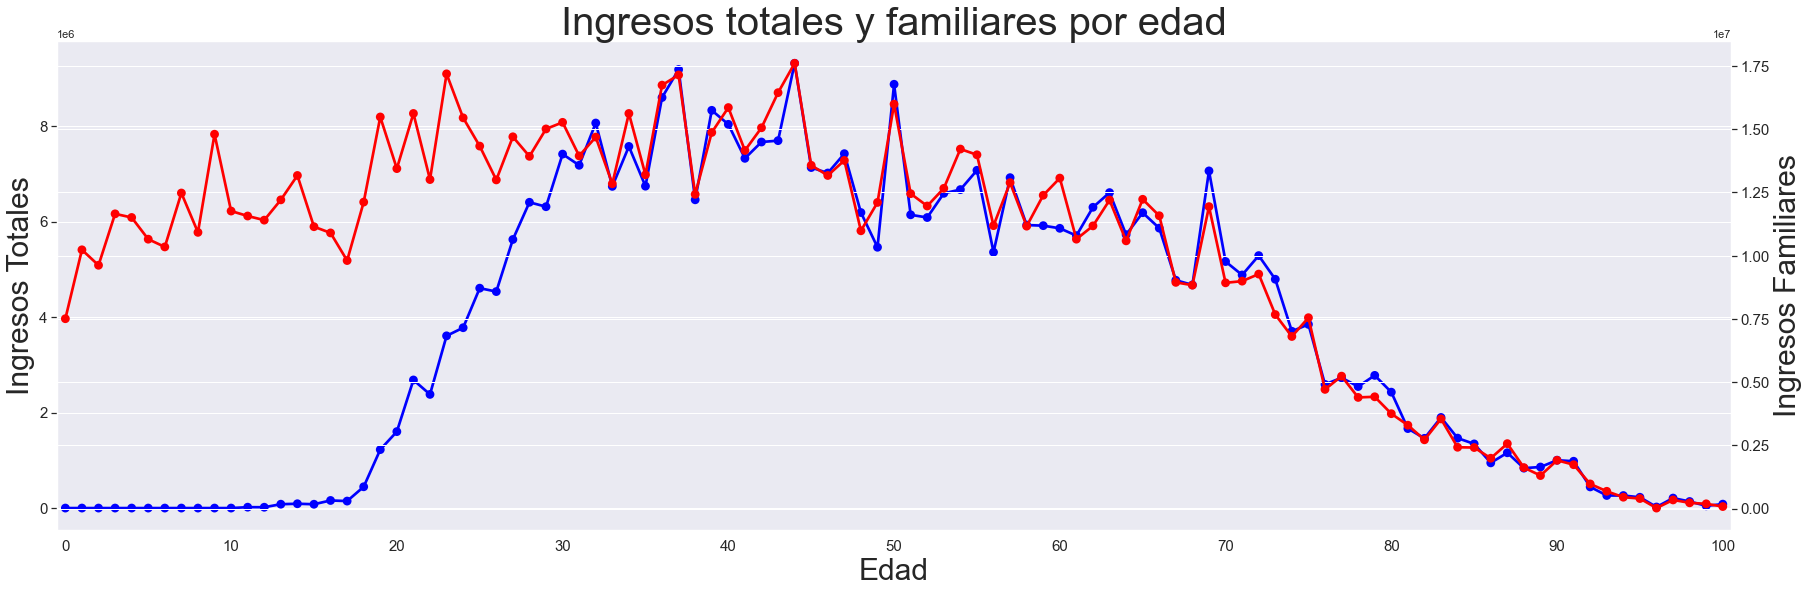

In [165]:
# gráfico lineal en base a edad con dos variables de calculo

from ast import In
from distutils.log import info


fig = plt.figure(figsize=(30, 9))

Ingresos = ['ingresos_totales', 
                                 'ingresos_familiares']

grouped_day = df.groupby('edad')[Ingresos].sum().reset_index()

ax = sns.pointplot(x = 'edad', y = 'ingresos_totales', data=grouped_day, 
                   color = 'blue', label='Ingresos Totales');
ax.set_xlabel("Edad",fontsize=30)
ax.set_ylabel("Ingresos Totales",fontsize=30)
ax.tick_params(labelsize=15)

ax2 = ax.twinx();
ax = sns.pointplot(x = 'edad', y = 'ingresos_familiares', data=grouped_day,  
                   color = 'red', label='ingresos_familiares', ax=ax2)

ax.set_title("Ingresos totales y familiares por edad",size=40)
ax.set_xticks(range(0,101,10))
ax.set_xticklabels(range(0,101,10))
ax.set_ylabel("Ingresos Familiares",fontsize=30)
ax.tick_params(labelsize=20)
ax.tick_params(axis='both',
               labelsize=15
               )

fig.savefig('Informe/Imagenes/ABCompVarNum.png');

Se puede ver que desde los 30 años en adelante el ingreso total de la persona se corresponde con el ingreso familiar. Por ende suele haber un único ingreso fuerte por grupo familiar.

### Comparación de variables categóricas con numéricas

Adicionalmente, vamos a comparar algunas variables con nuestro target, comenzando con los ingresos totales, pero primero veamos como se relacionan algunas numéricas con el genero de los encuestados:

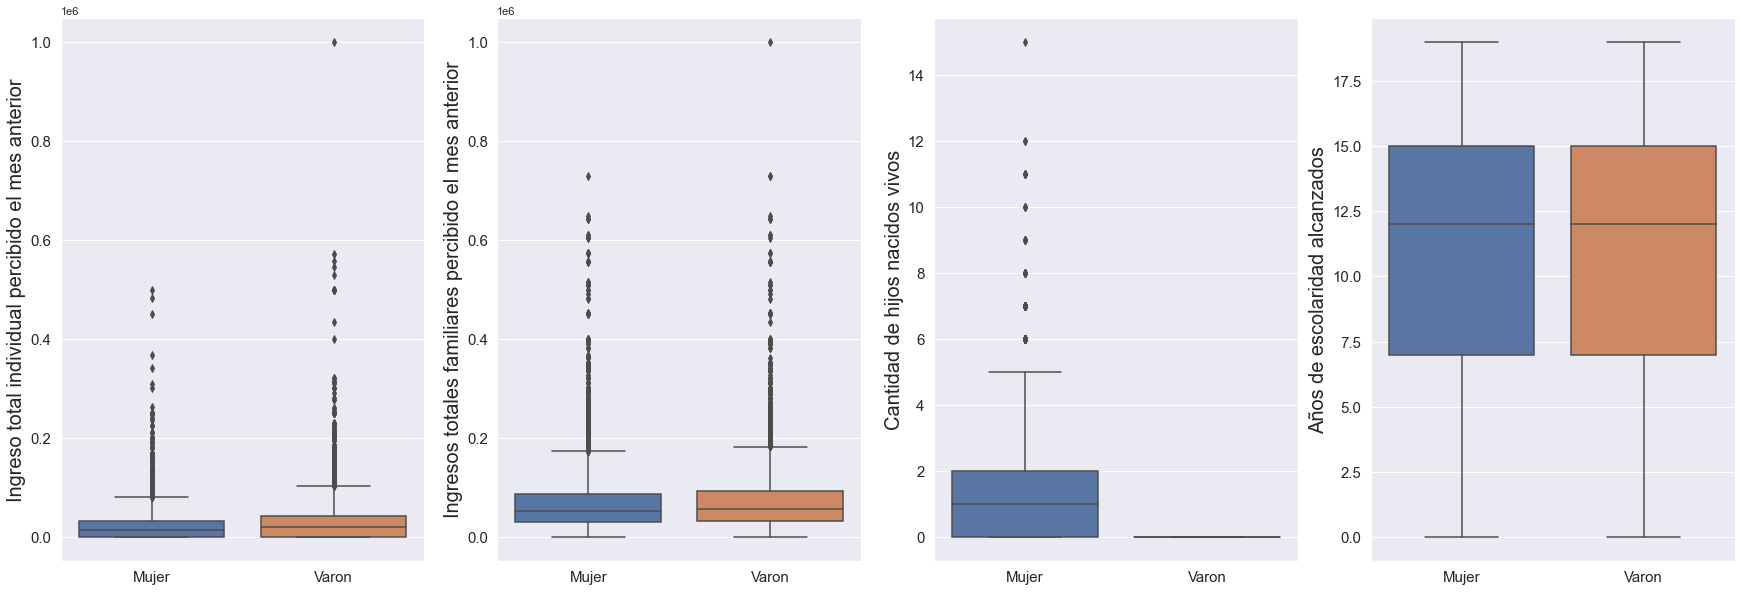

In [166]:
lista = ['ingresos_totales','ingresos_familiares','cant_hijos_nac_vivos','años_escolaridad']
fig, ax = plt.subplots(figsize=(30,10),ncols=len(lista))

for n,i in enumerate(lista):
  sns.boxplot(x = 'sexo', y= i, data=df,ax=ax[n],orient='v')
  ax[n].tick_params(labelsize=15)
  ax[n].set_ylabel(etiquetas[i],size=20)
  ax[n].set_xlabel("")

fig.savefig('Informe/Imagenes/ABCatVsNum1.png')

Probemos quitando outliers, a excepción de la cantidad de hijos nacidos vivos (puesto que no arrojará ningún dato nuevo) y de años de escolaridad (que no tiene outliers)

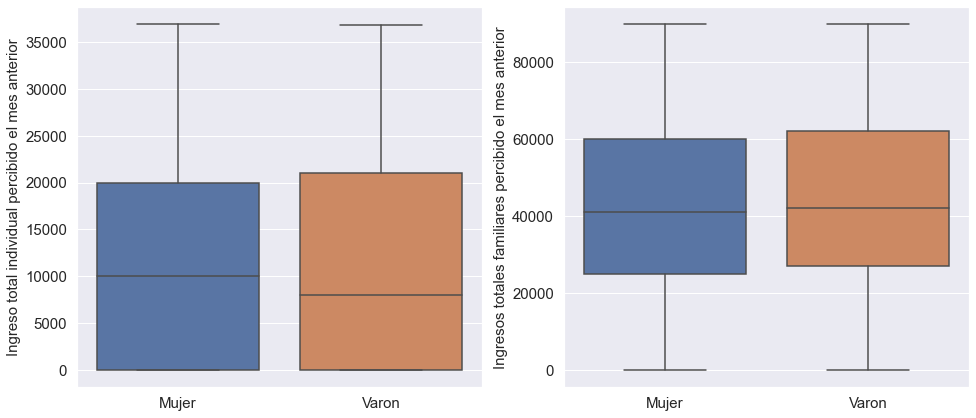

In [167]:
lista = ['ingresos_totales','ingresos_familiares']
fig, ax = plt.subplots(figsize=(16,7),ncols=len(lista))

for n,i in enumerate(lista):
  data = df[df[i]<df[i].describe()['75%']]
  sns.boxplot(x = 'sexo', y= i, data=data,ax=ax[n],orient='v')
  ax[n].tick_params(labelsize=15)
  ax[n].set_ylabel(etiquetas[i],size=15)
  ax[n].set_xlabel("") 

fig.savefig('Informe/Imagenes/ABCatVsNum2.png')


Por parte de las variables de ingreso, no parece haber nada disruptivo. 
La distribución por ingreso y años de escolaridad pareciera ocurrir pero no en un orden lineal.

Llama la atención la variable "sexo": por algún motivo, todos los encuestados hombres figuran sin hijos nacidos vivos. Alternativamente, se podría investigar la metodología de la encuesta para ver si hay alguna respuesta.
Adicionalmente, los hombres parecieran tener ingresos totales y familiares mayores que las mujeres, pero no pareciera que haya distribuciones desiguales en los años de escolaridad.

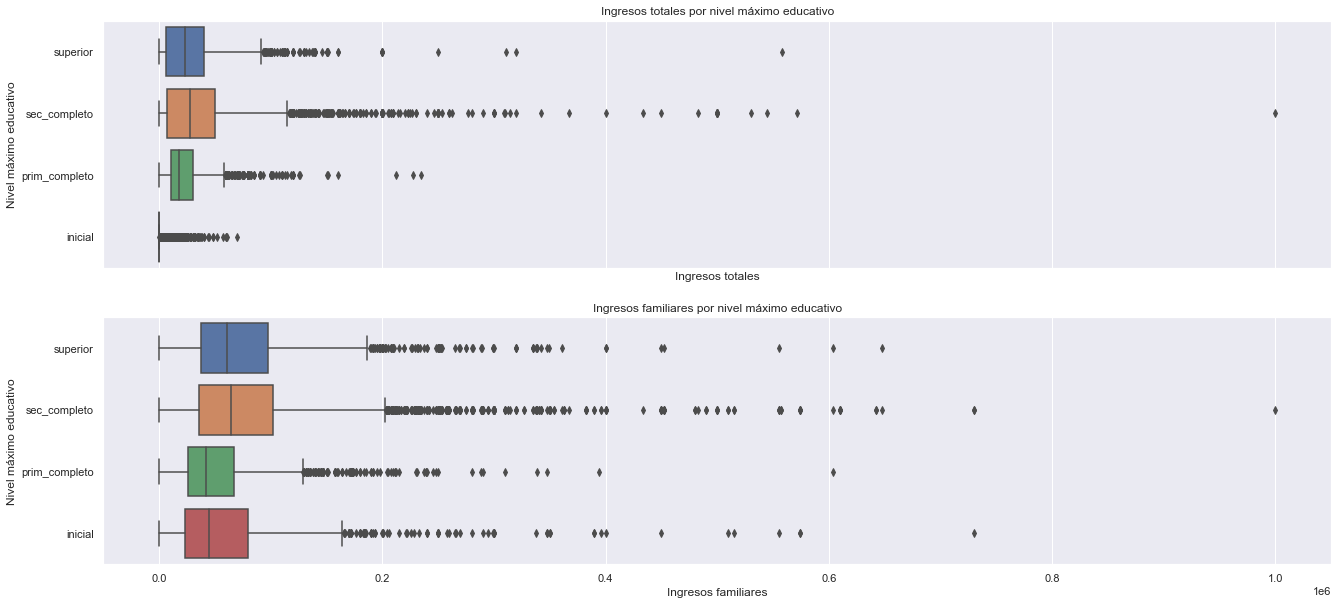

In [168]:
fig, ax = plt.subplots(figsize=(22,10),nrows=2, sharex=True)
sns.boxplot(y = 'Target', 
            x='ingresos_totales', 
            data=df,ax=ax[0]).set(title="Ingresos totales por nivel máximo educativo", 
                                  ylabel="Nivel máximo educativo", xlabel="Ingresos totales");
sns.boxplot(y = 'Target', 
            x='ingresos_familiares', 
            data=df,ax=ax[1]).set(title="Ingresos familiares por nivel máximo educativo", 
                                  ylabel="Nivel máximo educativo", xlabel="Ingresos familiares")

fig.savefig('Informe/Imagenes/ABCatVsNum3.png');

Ahora probemos sin los outliers, poniendo como tope el percentil 75 del valor de target con mayor valor de ingresos (secundario completo)

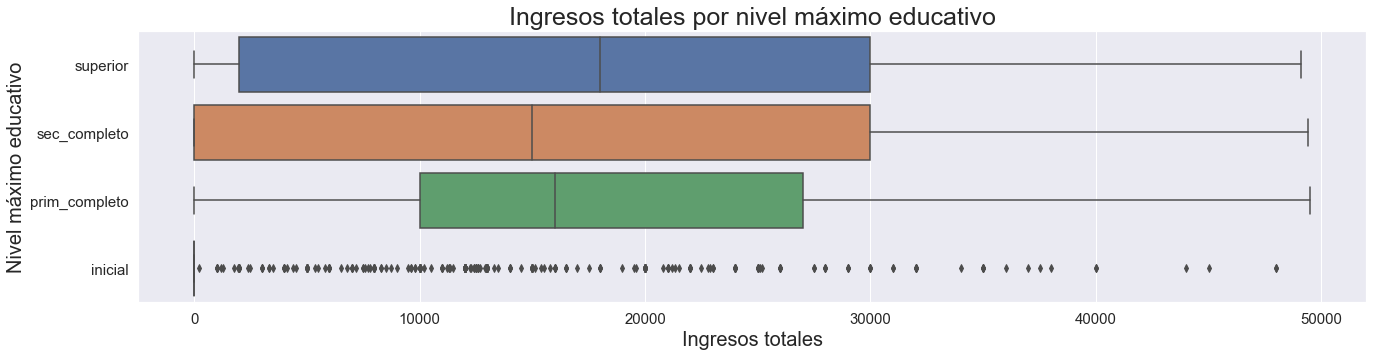

In [186]:
fig, ax = plt.subplots(figsize=(22,5))

sns.boxplot(data=df[df['ingresos_totales']<(df[df['Target']=='sec_completo']['ingresos_totales'].describe()['75%'])],
         y = 'Target', 
         x='ingresos_totales',            
         ax=ax)

ax.tick_params(axis='both',
               labelsize=15
               )

ax.set_title("Ingresos totales por nivel máximo educativo", size=25)
ax.set_ylabel("Nivel máximo educativo",size=20)
ax.set_xlabel("Ingresos totales",size=20)

fig.savefig('Informe/Imagenes/ABCatVsNum3Bis.png');

Parece que para el nivel inicial la remoción de outliers en otra categoría sigue siendo insuficiente para mostrar la distribución real de la variable. Echemos un vistazo a los valores de esta categoría.

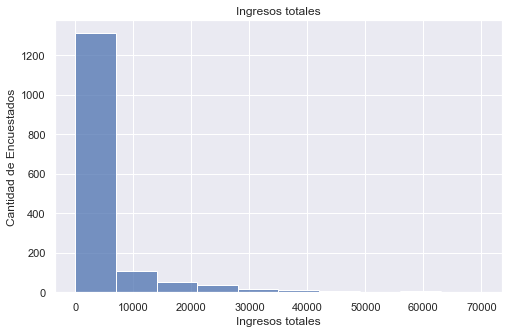

In [187]:
fig, ax = plt.subplots(figsize=(8,5))

sns.histplot(data=df[df['Target']=='inicial'],
             x='ingresos_totales',
             bins=10).set(title='Ingresos totales',
                          ylabel="Cantidad de Encuestados",
                          xlabel="Ingresos totales")

fig.savefig('Informe/Imagenes/ABCatVsNum4.png');

Lógicamente, la enorme mayoría de los ingresos para el valor inicial dan 0, puesto que incluye a personas que en ese momento estaban cursando su educación inicial, por lo que tenían entre 2 y 6 años.

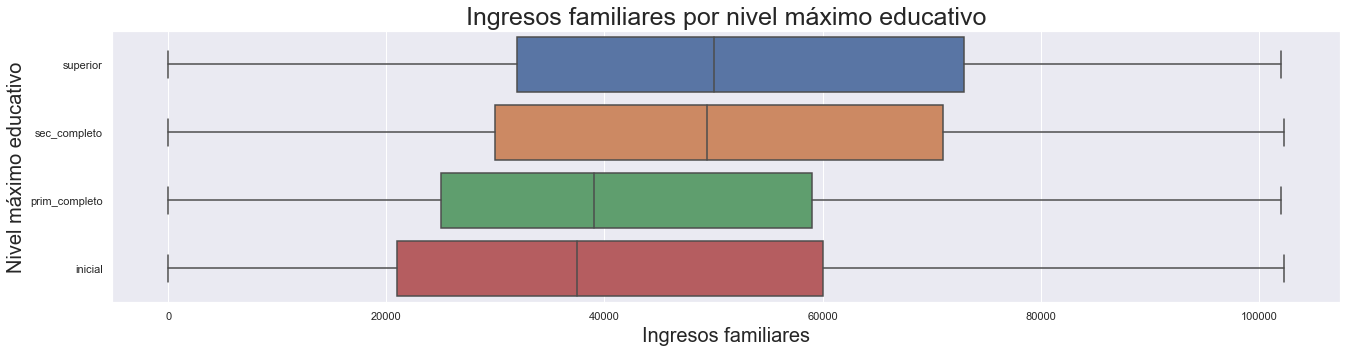

In [188]:
fig, ax = plt.subplots(figsize=(22,5))

sns.boxplot(y = 'Target', 
            x='ingresos_familiares', 
            data=df[df['ingresos_familiares']<(df[df['Target']=='sec_completo']['ingresos_familiares'].describe()['75%'])],
            ax=ax)
            
ax.set_title("Ingresos familiares por nivel máximo educativo", size=25)
ax.set_ylabel("Nivel máximo educativo",size=20)
ax.set_xlabel("Ingresos familiares",size=20)

fig.savefig('Informe/Imagenes/ABCatVsNum5.png');

En definitiva, se observa un corrimiento de los valores centrales (dentro de la caja) hacia la izquierda a medida que aumenta el nivel educativo.

### Variable numéricas con comuna

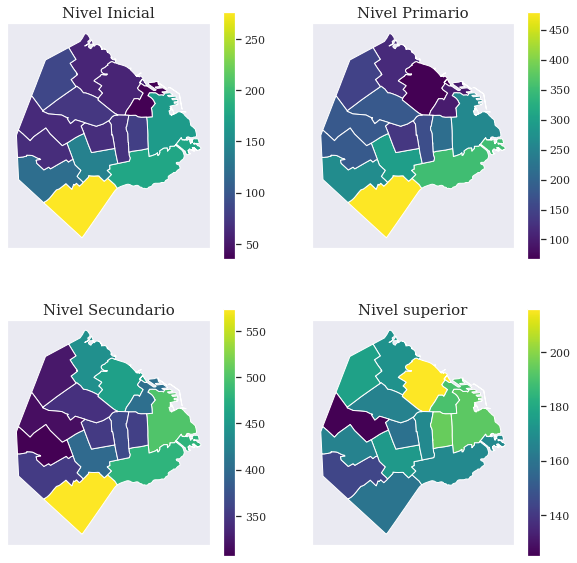

In [211]:
# Unimos ambos datasets
from tkinter import Variable


m = gpd.GeoDataFrame(pd.merge(pd.DataFrame(df.value_counts(['Target','comuna'])).reset_index(),
                                    comunas[["COMUNAS","geometry"]],left_on="comuna",right_on="COMUNAS"))
#Renombramos una columna para que lo pueda procesar la función de geopandas
m['count'] = m[0]

#generamos el lienzo
fig , ax = plt.subplots(figsize=(10,10),ncols=2,nrows=2,sharex=True,sharey=True)
plt.rcParams.update({"font.size":12,"axes.titlesize":25,"axes.labelsize":15, 'font.family':'serif'})

def mapa(variable,etiqueta,fila,columna):
  #mapa 
  m[m['Target']==variable].plot(column='count',
                                legend=True,
                                cmap="viridis",
                                legend_kwds={'label': ""},
                                ax=ax[fila,columna])
  
  #Título y etiquetas de variables    
  ax[fila,columna].set_title(etiqueta,size=15)
  ax[fila,columna].get_xaxis().set_visible(False)
  ax[fila,columna].get_yaxis().set_visible(False);

mapa("superior","Nivel superior",1,1)
mapa("sec_completo","Nivel Secundario",1,0)
mapa("prim_completo","Nivel Primario",0,1)
mapa("inicial","Nivel Inicial",0,0)

fig.savefig('Informe/Imagenes/ABCatVsNum6.png', bbox_inches='tight');

Se observa que en el sur de la ciudad hay  mayor cantidad de encuestados con niveles de inicial, primario y secundario completo, mientras que el norte (particularmente el barrio de Palermo) tiene mayor cantidad de personas con estudios superiores. En menor medida también las comunas del este (comúnmente llamado el "centro" de la ciudad) destacan por la cantidad de encuestados con nivel superior.

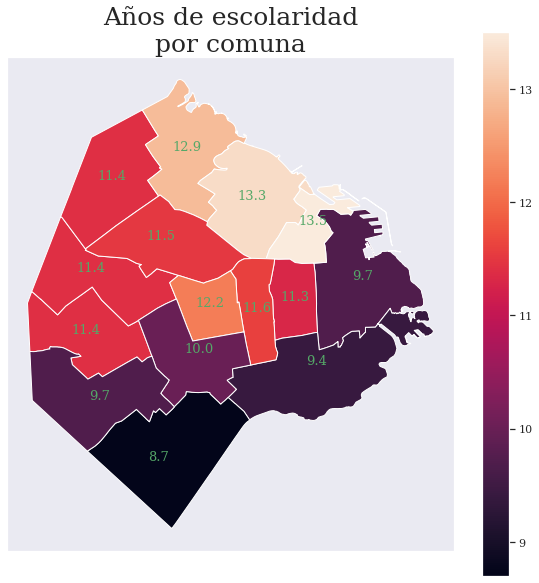

In [191]:
#armamos el mismo dataset anterior pero tomando el promedio de cada variable por comuna
m = gpd.GeoDataFrame(pd.merge(df.groupby("comuna").aggregate(np.mean),
                                    comunas[["COMUNAS","geometry"]],left_on="comuna",right_on="COMUNAS"))

#redondeamos los valores
m["años_escolaridad"] = round(m["años_escolaridad"],1)

#armamos el gráfico
fig, ax = plt.subplots(figsize=(10,10))

m.plot(column="años_escolaridad",legend=True,cmap="rocket",
             legend_kwds={'label': ""},ax=ax)

#genero una nueva variable con las coordenadas para poder agregar etiquetas en el centro geográfico de cada comuna
m['coords'] = m['geometry'].apply(lambda x: x.representative_point().coords[:])
m['coords'] = [coords[0] for coords in m['coords']]

for idx, row in m.iterrows():
    plt.annotate(row['años_escolaridad'], xy=row['coords'],
                 horizontalalignment='center',size=13,color="g")
    
#Título y etiquetas de variables    
ax.set_title("Años de escolaridad\npor comuna")
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

fig.savefig('Informe/Imagenes/ABCatVsNum7.png');

Lo que podemos observar en los últimos dos gráficos es una clara división geográfica del nivel educativo:

*  Las comunas del norte son las que tienen mayor nivel educativo
*  Las comunas del centro tienen niveles medios
*  Las comunas del sur (con las comuna 6 en el centro de la ciudad como outlier) y la comuna 1 en el este son las que tienen niveles más bajos

## Análisis multivariado

Probamos de cruzar años de escolaridad, nivel máximo educativo y los ingresos totales.

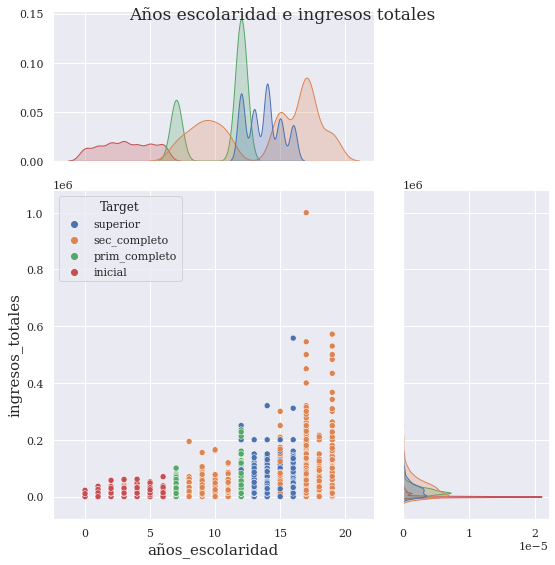

In [210]:
a=sns.jointplot(data=df, y="ingresos_totales", x="años_escolaridad", hue='Target',   height=8, ratio=2, marginal_ticks=True)
a.fig.suptitle("Años escolaridad e ingresos totales", fontsize=17)
a.fig.savefig('Informe/Imagenes/AMIngVsAnosEsc.png', bbox_inches='tight');

Conclusiones de la visualización:
* Hasta los 6 años, como era esperable, todos los casos llegan al nivel inicial.
* Vemos dos años en que aparece el primario completo: 7 y 12 años. Estimamos que se debe a la división entre los que comenzaron su educación en la primaria y los que comenzaron en el nivel inicial.
* A partir de los 12 años vemos un aumento consistente de los ingresos totales.

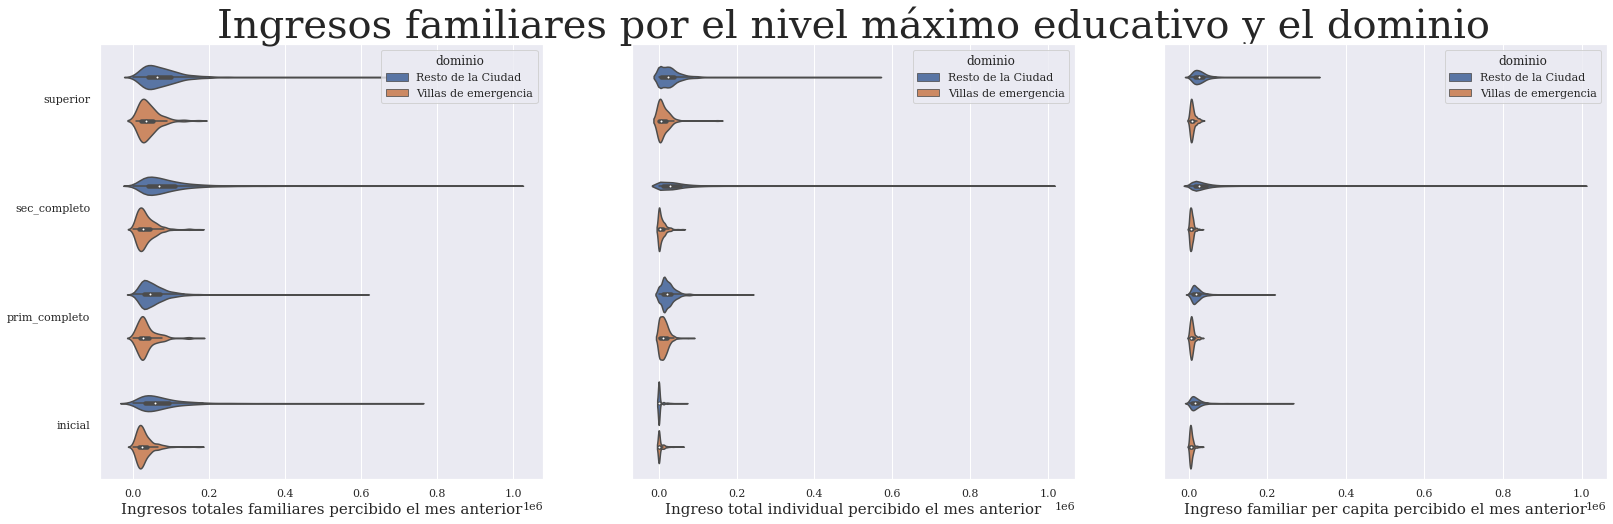

In [33]:
fig, ax = plt.subplots(figsize=(27,8),ncols=3,sharey=True)
for n,i in enumerate(['ingresos_familiares','ingresos_totales','ing_per_cap_familiar']):
  sns.violinplot(data=df,x=i,hue='dominio',y='Target',ax=ax[n])
  ax[n].set_ylabel("")
  ax[n].set_xlabel(etiquetas[i])
ax[1].set_title("Ingresos familiares por el nivel máximo educativo y el dominio",size=40)

fig.savefig('Informe/Imagenes/AMIngVSTarget.png');

¿Y si sacamos los outliers?

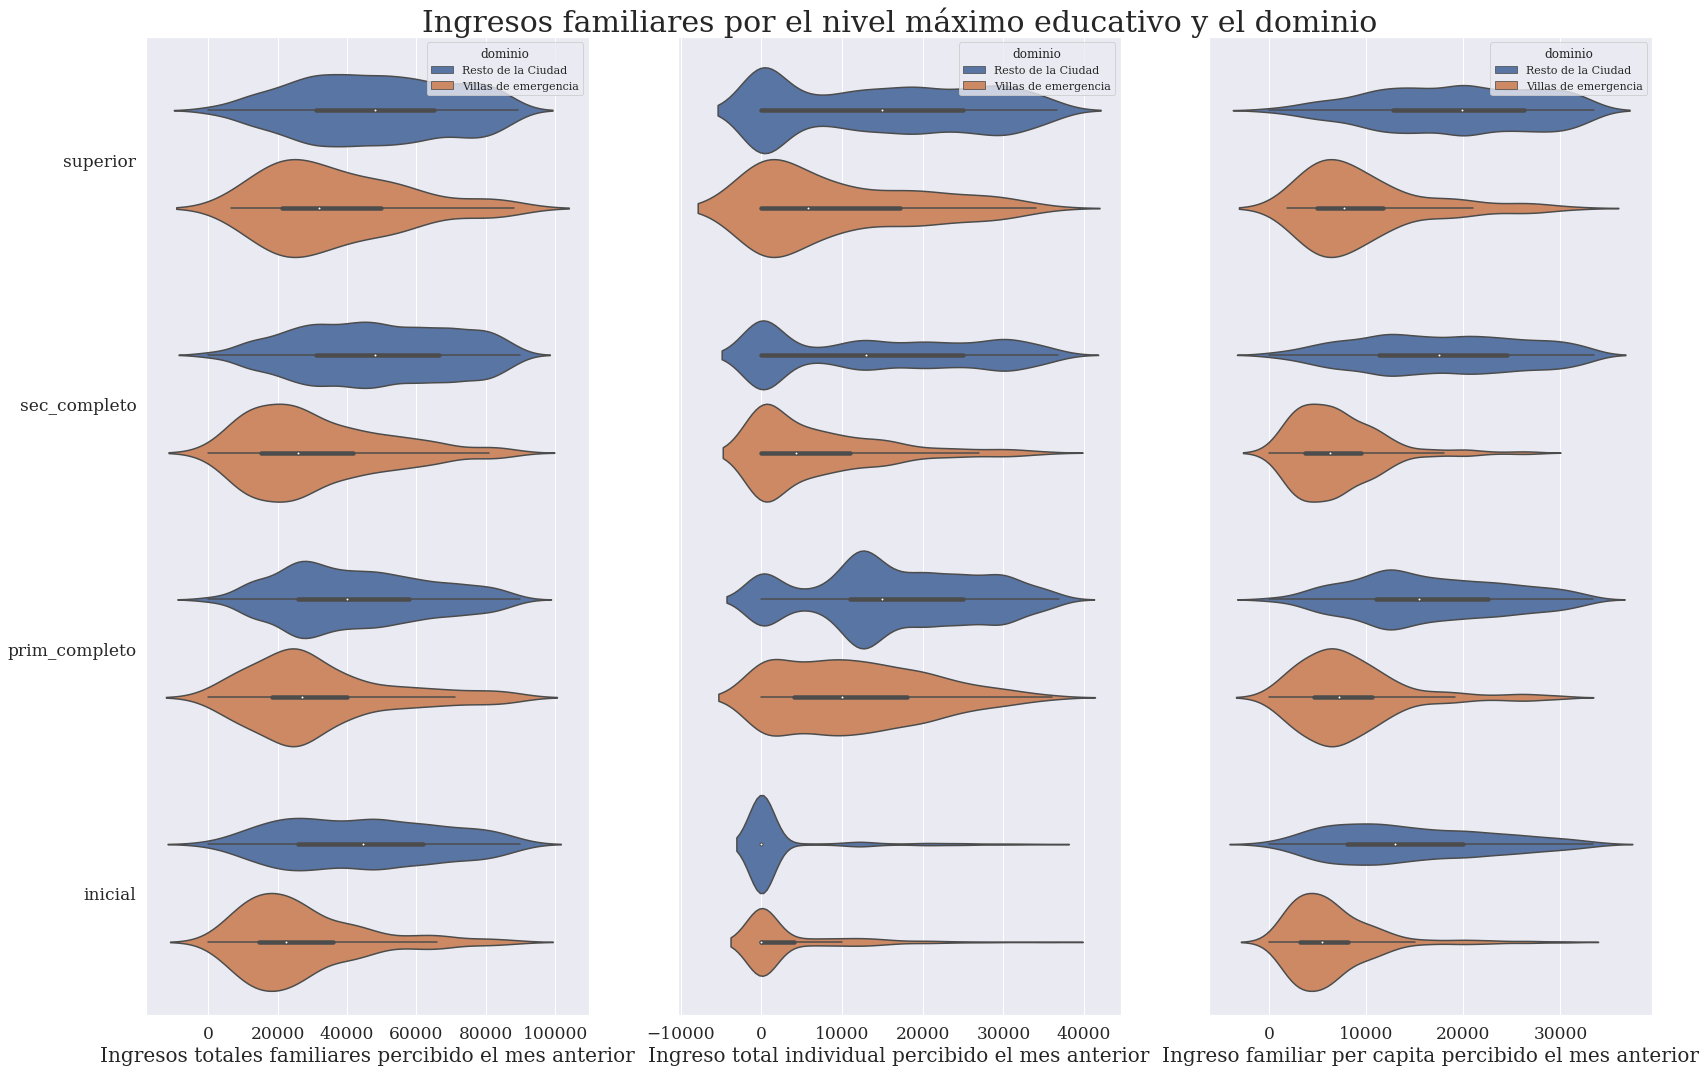

In [204]:
fig, ax = plt.subplots(figsize=(27,18),ncols=3,sharey=True)
for n,i in enumerate(['ingresos_familiares','ingresos_totales','ing_per_cap_familiar']):
  sns.violinplot(data=df[df[i]<df[i].describe()['75%']],x=i,hue='dominio',y='Target',ax=ax[n])
  ax[n].set_ylabel("")
  ax[n].set_xlabel(etiquetas[i],size=20)
  ax[n].tick_params(labelsize=17)
ax[1].set_title("Ingresos familiares por el nivel máximo educativo y el dominio",size=30)

fig.savefig('Informe/Imagenes/AMIngVSTargetBis.png', bbox_inches='tight');

Aquí obtuvimos un descubrimiento interesante: no importa el nivel máximo educativo, los casos que no provienen de villas de emergencia (dominio="villas_de_emergencia") obtienen en promedio ingresos más altos en todos los niveles educativos. El alcanzar estudios superiores no parece homogeneizar ambos conjuntos. Esto se puede observar en el segundo gráfico, ya que el violín naranja acumula mayor cantidad de casos hacia la derecha, en comparación con los violines azules que tienen una mayor distribución.

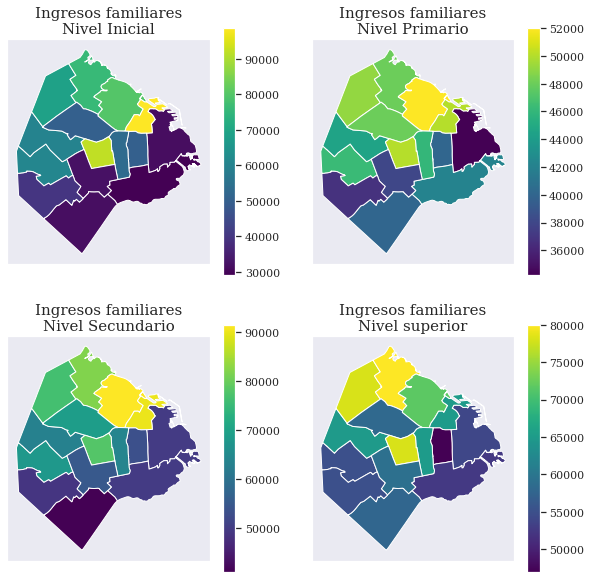

In [209]:
# Unimos ambos datasets
df2 = df.groupby(["comuna",'Target']).agg({'ingresos_familiares':"median"}).reset_index() #Tomamos la mediana de los ingresos familiares

df2 = gpd.GeoDataFrame(pd.merge(df2,comunas[["COMUNAS","geometry"]],left_on="comuna",right_on="COMUNAS"))

#comunas.iloc[:,0:15] = comunas.iloc[:,0:15].applymap(int)

#generamos el lienzo
fig , ax = plt.subplots(figsize=(10,10),ncols=2,nrows=2,sharex=True,sharey=True)
plt.rcParams.update({"font.size":12,"axes.titlesize":25,"axes.labelsize":15, 'font.family':'serif'})

def mapa(variable,etiqueta,fila,columna):
  #mapa
  df2[df2['Target']==variable].plot(column='ingresos_familiares',
                                            legend=True,cmap="viridis",legend_kwds={'label': ""},ax=ax[fila,columna])

  #Título y etiquetas de variables    
  ax[fila,columna].set_title('Ingresos familiares\n' + etiqueta,size=15)
  ax[fila,columna].get_xaxis().set_visible(False)
  ax[fila,columna].get_yaxis().set_visible(False);

mapa("superior","Nivel superior",1,1)
mapa("sec_completo","Nivel Secundario",1,0)
mapa("prim_completo","Nivel Primario",0,1)
mapa("inicial","Nivel Inicial",0,0)

fig.savefig('Informe/Imagenes/AMIngVsComuna.png', bbox_inches='tight');


Aquí podemos observar que a medida que avanza el nivel educativo máximo se atenúan levemente las diferencias de ingresos familiares entre comunas. Queda pendiente cruzar estos datos con la edad, para saber si el hecho de incluir a menores de edad está sesgando los valores para nivel inicial, primario y secundario.

# Modelos analíticos

En esta sección abordaremos la creación de diversos modelos de machine learning para intentar predecir la variable de nivel máximo educativo (renombrada como Target)

In [36]:
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder , LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.ensemble import RandomForestClassifier
import time

Comenzamos transformando algunas variables para poder trabajar con los algoritmos:
* recategorizando la variables "Target" en variables numéricas,
* reagrupamos la variable "comuna" por regiones para reducir la dimensionalidad,
* y por último renombramos algunas variables para que sean más cortas.

Y verificamos como quedan las variables del dataset:

In [37]:
# Recategorizando la variables "Target" en variables numéricas
df['Target'] = df.Target.map({'inicial'      :1,
                              'prim_completo':2,
                              'sec_completo' :3,
                              'superior'     :4,
                               np.nan         :np.nan}).astype('Int64')

# Reagrupamos la variable comuna por regiones para reducir la dimensionalidad
df['region'] = df['comuna']
df.loc[df['comuna'].isin(['12','13','14','2','15']),'region'] = 'norte'
df.loc[df['comuna'].isin(['5','3','1']),'region'] = 'centro'
df.loc[df['comuna'].isin(['8','4']),'region'] = 'sur'
df.loc[df['comuna'].isin(['6','7','9','10','11']),'region'] = 'oeste'

# Por último renombramos algunas variables para que sean más cortas
df.loc[df['afiliacion_salud']=='Solo obra social','afiliacion_salud'] = 'solo_o_social'
df.loc[df['afiliacion_salud']=='Solo plan de medicina prepaga por contratación voluntaria','afiliacion_salud'] = 'solo_prepaga'
df.loc[df['afiliacion_salud']=='Solo prepaga o mutual via OS','afiliacion_salud'] = 'solo_prepaga_o_mutual'
df.loc[df['afiliacion_salud']=='Solo sistema publico','afiliacion_salud'] = 'solo_sist_pub'
df.loc[df['situacion_conyugal']=='Separado/a de unión o matrimonio','afiliacion_salud'] = 'separado'

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14319 entries, 0 to 14318
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           14319 non-null  object 
 1   nhogar                       14319 non-null  object 
 2   miembro                      14319 non-null  object 
 3   comuna                       14319 non-null  object 
 4   dominio                      14319 non-null  object 
 5   edad                         14319 non-null  int64  
 6   sexo                         14319 non-null  object 
 7   parentesco_jefe              14319 non-null  object 
 8   situacion_conyugal           14318 non-null  object 
 9   num_miembro_padre            14319 non-null  object 
 10  num_miembro_madre            14319 non-null  object 
 11  estado_ocupacional           14319 non-null  object 
 12  cat_ocupacional              14319 non-null  object 
 13  calidad_ingresos

In [38]:
# Función que me de un archivo .csv para poder pasar el .info de forma más o menos automática al informe. 
def get_dataframe_info_to_csv(df,ruta):
    """
    input
       df -> DataFrame
       ruta -> ruta donde vamos a guardar el archivo .csv
    """

    df_types = pd.DataFrame(df.dtypes)
    df_nulls = df.count()
    
    df_null_count = pd.concat([df_types, df_nulls], axis=1)
    df_null_count = df_null_count.reset_index()
    
    # Reassign column names
    col_names = ["features", "types", "non_null_counts"]
    df_null_count.columns = col_names
    
    df_null_count.to_csv(ruta)

In [39]:
get_dataframe_info_to_csv(df,"Informe/CSV/MAInfo1.csv")

Y verificamos los diferentes valores de nuestra variable "Target:

In [40]:
df.Target.unique().T

<IntegerArray>
[4, 3, 2, <NA>, 1]
Length: 5, dtype: Int64

## Tratado de nulos

Armamos una función para tener una lista limpia de variables con nulos, que nos da como resultado:

In [41]:
#Armo una función para tener una lista limpia de variables con nulos
def info_nulos(data:pd.DataFrame,ruta):
    nulos = data.isnull().sum().where(lambda x:x>0).dropna().apply(int).sort_values()
    if len(nulos)>0:
        print(f'Variables con valores nulos:\n\n{nulos}')
    else: print(f'El dataset no tiene valores nulos')
    nulos.to_csv(ruta)
    
info_nulos(df,"Informe/CSV/TN1.csv")

Variables con valores nulos:

situacion_conyugal        1
lugar_nacimiento          1
sector_educativo          3
afiliacion_salud          4
años_escolaridad         62
nivel_max_educativo    1054
Target                 1096
hijos_nacidos_vivos    7784
dtype: int64


Entonces, para eliminar los valores nulos de la variable "años_escolaridad" reemplazamos los nulos con la mediana por comuna y sexo.

In [42]:
#reemplazo los nulos con la mediana por comuna y sexo

#creo dataframe de referencia
anios_escol_ref_null = df.groupby(['sexo', 'comuna']).median()['años_escolaridad'].reset_index()
anios_escol_ref_null

#función de replace en base a dataframe agrupado
def fill_na_escol_grouped(df_grouped , row_replace):
  if pd.isna(row_replace['años_escolaridad']):
    return df_grouped[(df_grouped['sexo'] == row_replace['sexo']) & (df_grouped['comuna'] == row_replace['comuna'])]['años_escolaridad'].values[0]
  else:
    return row_replace['años_escolaridad']

#transformación de train
df['años_escolaridad'] = df.apply(lambda row: fill_na_escol_grouped(anios_escol_ref_null, row), axis=1)

### Variable remplazadas con moda

A las variables:
* "lugar_nacimiento",
* "situacion_conyugal",
* "afiliacion_salud",
* "sector_educativo",
* "hijos_nacidos_vivos",

las vamos a reemplazar con la moda.


In [43]:
#variables que voy a reemplazar simplemente con la moda 
#lugar_nacimiento, situacion_conyugal, afiliacion_salud, 'sector_educativo', 'hijos_nacidos_vivos'

cols_rem_nulls = ['lugar_nacimiento',
                  'situacion_conyugal',
                  'afiliacion_salud',
                  'sector_educativo', 'hijos_nacidos_vivos'
                  ]
moda_variables= df.filter(cols_rem_nulls).mode()
df[cols_rem_nulls]=df[cols_rem_nulls].fillna(df.mode().iloc[0])

#De paso elimino la columna q ya no vamos a utilizar porque tenemos el Target
df.drop(columns='nivel_max_educativo', inplace=True)

#como solamente quedan los nulos del target elimino en todo el dataset
df.dropna(axis=0, inplace=True)
#Paso a número entero  
df['Target']=df.Target.astype(int)

Verificamos una última vez, para mostrar que ya no tenemos nulos en nuestro dataset.

In [44]:
info_nulos(df,"Informe/CSV/MAInfoFinal.csv")

El dataset no tiene valores nulos


## Target

### Borrado de variables

Hay muchas variables que consideramos que no es necesario sumarlas al algoritmo de clasificación dado que brindan información repetida o que no suma para la clasificación. A continuación se comparten las categoría que se descartarán para correr el algoritmo: 

*   id: no suma información para la clasificación,
*   nhogar: no suma información para la clasificación,
*   parentesco_jefe: no suma información para la clasificación,
*   miembro: no suma información para la clasificación,
*   num_miembro_padre: no suma información para la clasificación,
*   num_miembro_madre: no suma información para la clasificación,
*   cat_ocupacional brinda la misma información que estado_ocupacional,
*   calidad_ingresos_lab brinda la misma información que ingreso_total_lab,
*   calidad_ingresos_no_lab brinda la misma información que ingreso_total_no_lab,
*   calidad_ingresos_totales brinda la misma información que ingresos_totales,
*   calidad_ingresos_familiares brinda la misma información que ingreso_familiares,
*   estado_educativo no aporta información para la clasificación,
*   nivel_actual no aporta información para la clasificación,
*   hijos_nacidos_vivos brinda la misma información que cant_hijos_nac_vivos,
*   comuna: variable ya abordada en la variable 'región'.

In [45]:
# Hay variables que no aportan nada entonces las sacamos
no_var = ['id',
          'nhogar',
          'miembro',
          'parentesco_jefe',
          'num_miembro_padre',
          'num_miembro_padre',
          'num_miembro_madre',
          'cat_ocupacional',
          'calidad_ingresos_lab',
          'calidad_ingresos_no_lab', 
          'calidad_ingresos_totales',
          'calidad_ingresos_familiares', 
          'calidad_ingresos_familiares',
          'hijos_nacidos_vivos',
          'estado_educativo',
          'comuna',
          'nivel_actual'
          ]
          
df.drop(axis=1, columns=no_var, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13223 entries, 0 to 14318
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   dominio               13223 non-null  object 
 1   edad                  13223 non-null  int64  
 2   sexo                  13223 non-null  object 
 3   situacion_conyugal    13223 non-null  object 
 4   estado_ocupacional    13223 non-null  object 
 5   ingreso_total_lab     13223 non-null  int64  
 6   ingreso_total_no_lab  13223 non-null  int64  
 7   ingresos_totales      13223 non-null  int64  
 8   ingresos_familiares   13223 non-null  int64  
 9   ing_per_cap_familiar  13223 non-null  int64  
 10  sector_educativo      13223 non-null  object 
 11  años_escolaridad      13223 non-null  float64
 12  lugar_nacimiento      13223 non-null  object 
 13  afiliacion_salud      13223 non-null  object 
 14  cant_hijos_nac_vivos  13223 non-null  int64  
 15  Target             

In [46]:
#Guardamos el .info() en un .csv
get_dataframe_info_to_csv(df,"Informe/CSV/MAInfoFinal.csv")

## Procesamiento

Para preparar los datos para el modelado generamos una función que:
* Divide el dataframe en X_train, y_train, X_test e y_test, hacemos la división entre test y el train en un 30% y un 70% respectivamente, con una semilla especifica.
* Procesa el X_train y el X_test con un pipeline generado previamente, el cual convierte las variable numéricas con el minmaxscaler y las categóricas con one hot encoding.


In [47]:
# Generamos un pipeline para procesar la base

#obtener columnas categóricas
cat_col = df.select_dtypes(include='O').columns.tolist()

#generar a pipeline para numéricas 
numeric_transformer = Pipeline(steps=[("scaler", MinMaxScaler())])

#generar un pipeline para categóricas
categorical_transformer = Pipeline(steps=[("ohe",OneHotEncoder(handle_unknown="ignore"))])

# función que realiza el trabajo para cada pipeline y luego unirlo
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, make_column_selector(dtype_exclude=object)),
        ("cat", categorical_transformer, make_column_selector(dtype_include = object)),
    ])
#armo una función para procesar dataframes con el pipeline
def pipe(X: pd.DataFrame):
  # obtención de los procesos
  preprocessor.fit(X)
  # transformación
  array_enc = preprocessor.transform(X)
  #genero nombres de columnas
  columns_enc = np.append(X.select_dtypes(exclude='object').columns, 
                          preprocessor.named_transformers_['cat']['ohe'].get_feature_names_out(cat_col))
  X = pd.DataFrame(array_enc, columns = columns_enc, index = X.index)
  return X

# Armamos una función para combinar el pipeline y la división de la base de datos
def procesador(data:pd.DataFrame,test_size:int,random_state:int):
  #creo un dataset train y otro test 70-30 %%
  train, test = train_test_split(data, test_size = test_size,random_state=random_state, shuffle=True)
  # spliteo de datos y target del test
  X_train = train.loc[:,train.columns != 'Target'] 
  y_train = train.Target
  X_test = test.loc[:,test.columns != 'Target'] 
  y_test = test.Target

  # Paso el train y el test por el pipeline
  X_train = pipe(X_train)
  X_test  = pipe(X_test)

  #Chequeamos que las bases procesados por el one hot encoding tengan la misma cantidad de columnas
  if X_train.shape[1]!=X_test.shape[1]:
    print('Las particiones tienen una cantidad diferente de columnas')
  else:
    print('Las particiones tienen la misma cantidad de columnas')
  
  return X_train, y_train, X_test, y_test

Procesamos la base de datos con nuestra función

In [48]:
X_train,y_train,X_test,y_test = procesador(df,test_size=0.30,random_state=50)

Las particiones tienen la misma cantidad de columnas


## Árbol de decisión

Como primera aproximación, vamos a usar un arbol de clasificación usando como parámetros: random_state = 50,max_depth=8 y criterion='gini' para saber como performa y mejorarlo a partir de ahí.

In [49]:
#training del modelo
Tree = tree.DecisionTreeClassifier(random_state = 50,
                                   max_depth=8,
                                   criterion='gini'
                                   )
Tree.fit(X_train,y_train)

# predicción
y_pred_test = Tree.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix
#accuracy

print('El Accuracy score para el test es de: %.3f' % accuracy_score(y_test,y_pred_test))

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

confusion_matrix.index = ['Inicial','Primario', 'Secundario', 'Superior']
confusion_matrix.columns = ['Predicc. Inicial','Predicc. Primario', 'Predicc. Secundario', 'Predicc. Superior']
confusion_matrix.to_csv("Informe/CSV/CMDefault.csv")
confusion_matrix

El Accuracy score para el test es de: 0.940


,Predicc. Inicial,Predicc. Primario,Predicc. Secundario,Predicc. Superior
Inicial,445,0,1,0
Primario,0,961,8,9
Secundario,0,19,1693,59
Superior,1,57,84,630


In [51]:
def Classification_Report_to_csv(y_test, y_pred_test, ruta):
    """Función para guardar los classification reports"""
    clas_rep = classification_report(y_test,y_pred_test, output_dict=True)
    clas_rep = pd.DataFrame(clas_rep).transpose().to_csv(ruta)

In [52]:
Classification_Report_to_csv(y_test, y_pred_test,"Informe/CSV/CRDefaulto.csv")
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       446
           2       0.93      0.98      0.95       978
           3       0.95      0.96      0.95      1771
           4       0.90      0.82      0.86       772

    accuracy                           0.94      3967
   macro avg       0.94      0.94      0.94      3967
weighted avg       0.94      0.94      0.94      3967



A simple vista, parece que el modelo performa muy bien, dado su accuracy. Ahora calculemos su sesgo y su varianza.

In [53]:
#Armamos una función para imprimir el valor de la varianza y el sesgo
def print_scores(model ,X_train , Y_train,predictions):
    sesgo = round(model.score(X_train, Y_train),4)
    varianza = round(sesgo-accuracy_score(y_test,predictions),4)

    print('Análisis de sesgo y varianza')
    print("------------------------------------------")
    print(f"La varianza tiene un valor de {varianza}")
    print(f"El sesgo tiene un valor de {sesgo}")
    return sesgo, varianza

In [54]:
s,v =print_scores(Tree, X_train, y_train, y_pred_test)

Análisis de sesgo y varianza
------------------------------------------
La varianza tiene un valor de 0.0289
El sesgo tiene un valor de 0.9689


**Conclusiones:**

* **Bias o sesgo:** 96.89% que nos indica que tengo poco error. => low bias
* **Variance=Test_Score - Bias==** 2.89%  => low variance

**El modelo tiene una buena relación de sesgo y varianza**

Sin embargo, vamos a probar cuáles fueron las variables que son más importantes para el armado del modelo. Esto nos permitirá volver el modelo más robusto al quitar las mismas.

In [55]:
# verificar características importantes
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
feature_importances_df = pd.DataFrame(
    {"feature": list(X_train.columns), "importance": Tree.feature_importances_}
).sort_values("importance", ascending=False)

#variables que dan 0 de importancia, las usaremos para quitarlas del próximo modelo y ahorrar tiempo de cómputo
sin_imp = feature_importances_df[feature_importances_df['importance']==0]['feature'].to_list()

# Mostrar
feature_importances_df[feature_importances_df['importance']>0.01]

Importancia de los predictores en el modelo
-------------------------------------------


,feature,importance
6,años_escolaridad,0.840665
23,sector_educativo_No corresponde,0.149057


Parece que los años de escolaridad tiene una importancia del 84%, por mucho superior al resto de variables.

Por lo tanto, vamos a tener que desarrollar un nuevo modelo sin esta variable. El principal motivo es que los años de escolaridad es un dato que puede contestarse de forma conjunta con el nivel máximo educativo, por lo que tiene sentido que si no tenés la variable target, tampoco tengas la variable de los años de escolaridad.

In [56]:
# Quitamos la variable años_escolaridad y repetimos el armado del modelo
df2 = df.drop('años_escolaridad',axis=1)

X_train,y_train,X_test,y_test = procesador(df2,test_size=0.30,random_state=50)

#quitamos las variables sin valor en el modelo
X_train.drop(sin_imp,axis=1,inplace=True)
X_test.drop(sin_imp,axis=1,inplace=True)

model2 = tree.DecisionTreeClassifier(random_state = 50,
                                     criterion='entropy'
                                     ) # con hiperparametros default
model2.fit(X_train,y_train)

# predicción
y_pred_test = model2.predict(X_test)

Las particiones tienen la misma cantidad de columnas


In [57]:
#Empezamos a recolectar las métricas de algunos modelos para la comparación final
ac_1 = accuracy_score(y_test,y_pred_test) #Acá nos llevamos el accuracy

Classification_Report_to_csv(y_test, y_pred_test,"Informe/CSV/CRDefault2.csv")

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.83      0.79      0.81       446
           2       0.45      0.26      0.33       978
           3       0.56      0.66      0.60      1771
           4       0.39      0.45      0.42       772

    accuracy                           0.53      3967
   macro avg       0.56      0.54      0.54      3967
weighted avg       0.53      0.53      0.52      3967



In [58]:
ses_1 , var_1 = print_scores(model2, X_train, y_train, y_pred_test) #De acá nos llevamos el sesgo y la varianza

Análisis de sesgo y varianza
------------------------------------------
La varianza tiene un valor de 0.4639
El sesgo tiene un valor de 0.9978


**Conclusiones:**

* **Bias o sesgo:** 99.78% que nos indica que tengo poco error. => low bias
* **Variance=Test_Score - Bias==** 46.39%  => high variance

**OVERFITTING**

Por lo que se observa, el árbol performa bastante peor sin esta variable, aumentando especialmente la varianza. Por lo tanto vamos a probar de mejorar nuestro modelo con un grid search.

### Gridsearch con CV

In [59]:
##Gridsearch con CV

# parámetros a correr
param_grid = {'max_depth': range(5,11),
              'max_features': range(1,14),
              'criterion': ['gini','entropy','log_loss']
              }

model = tree.DecisionTreeClassifier(random_state=50)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

In [60]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 234 candidates, totalling 2340 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=50),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(5, 11),
                         'max_features': range(1, 14)},
             verbose=2)

In [61]:
print("El mejor arbol de decisión posible obtiene %.3f." %grid_search.best_score_,
      "\n\nPara eso el arbol debe tener una profundidad de ",
      grid_search.best_params_['max_depth'],", utilizar ", grid_search.best_params_['max_features'], " variables y usar el método ",grid_search.best_params_['criterion'])

El mejor arbol de decisión posible obtiene 0.642. 

Para eso el arbol debe tener una profundidad de  6 , utilizar  10  variables y usar el método  gini


In [62]:
#Copiamos los parámetros que obtuvimos en el grid search
X_train,y_train,X_test,y_test = procesador(df2,test_size=0.30,random_state=50)

X_train.drop(sin_imp,axis=1,inplace=True)
X_test.drop(sin_imp,axis=1,inplace=True)

model3 = tree.DecisionTreeClassifier(random_state = 50,max_depth=6,max_features=10, criterion='gini') # con hiperparametros obtenidos del grid search
model3.fit(X_train,y_train)

# predicción
y_pred_test = model3.predict(X_test)

Las particiones tienen la misma cantidad de columnas


In [63]:
ac_2 = accuracy_score(y_test,y_pred_test)

Classification_Report_to_csv(y_test, y_pred_test,"Informe/CSV/CRBestMod.csv")

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.99      0.74      0.85       446
           2       0.49      0.21      0.30       978
           3       0.55      0.87      0.67      1771
           4       0.78      0.41      0.53       772

    accuracy                           0.60      3967
   macro avg       0.70      0.56      0.59      3967
weighted avg       0.63      0.60      0.57      3967



In [64]:
ses_2 , var_2 = print_scores(model3, X_train, y_train, y_pred_test)

Análisis de sesgo y varianza
------------------------------------------
La varianza tiene un valor de 0.0515
El sesgo tiene un valor de 0.6527


* **Bias o sesgo:** 65.27% que nos indica que tengo bastantes errores => high bias
* **Variance=Test_Score - Bias==** 5.14%  => low variance

**UNDERFITTING**

**Conclusiones**

Utilizar el grid search nos permitió mejorar bastante el modelo que había perdido bastante accuracy al retirar los años de escolaridad. La métrica que más pudimos mejorar con este método fue la varianza, que pasó se redujo al 5%.

## Random Forest

Ahora vamos a trabajar con random forest, para saber si este algoritmo nos arroja mejores resultados.

In [65]:
X_train,y_train,X_test,y_test = procesador(df,test_size=0.30,random_state=50)
Forest = RandomForestClassifier(n_estimators=200,
                                max_depth=15,
                                random_state=50,
                                criterion='gini'
                                ) #usamos parámetros de forma discrecional sin un criterio específico
Forest.fit(X_train,y_train)

Las particiones tienen la misma cantidad de columnas


RandomForestClassifier(max_depth=15, n_estimators=200, random_state=50)

In [66]:
predicc_forest = Forest.predict(X_test)

In [67]:
Classification_Report_to_csv(y_test, predicc_forest,"Informe/CSV/RTFirst.csv")
print(classification_report(y_test, predicc_forest))

              precision    recall  f1-score   support

           1       1.00      0.96      0.98       446
           2       0.86      0.95      0.90       978
           3       0.91      0.93      0.92      1771
           4       0.92      0.76      0.83       772

    accuracy                           0.91      3967
   macro avg       0.92      0.90      0.91      3967
weighted avg       0.91      0.91      0.90      3967



In [68]:
s, v = print_scores(Forest, X_train, y_train, predicc_forest)

Análisis de sesgo y varianza
------------------------------------------
La varianza tiene un valor de 0.072
El sesgo tiene un valor de 0.978


El random forest performa bastante bien, pero vamos a repetir la búsqueda de variables importantes.

In [69]:
# verificar características importantes
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
feature_importances_df = pd.DataFrame(
    {"feature": list(X_train.columns), "importance": Forest.feature_importances_}
).sort_values("importance", ascending=False)

sin_imp = feature_importances_df[feature_importances_df['importance']==0]['feature'].to_list()

# Mostrar
feature_importances_df[feature_importances_df['importance']>0.01]

Importancia de los predictores en el modelo
-------------------------------------------


,feature,importance
6,años_escolaridad,0.435791
0,edad,0.117252
23,sector_educativo_No corresponde,0.054008
3,ingresos_totales,0.043346
14,situacion_conyugal_No corresponde,0.041583
5,ing_per_cap_familiar,0.041364
4,ingresos_familiares,0.034625
22,sector_educativo_Estatal/publico,0.029472
1,ingreso_total_lab,0.028521
2,ingreso_total_no_lab,0.017808


Aquí parece que años de escolaridad redujo la enorme importancia que tenía en el random tree. Sin embargo, sigue correspondiendo quitarlo del modelo.

In [70]:
X_train,y_train,X_test,y_test = procesador(df2,test_size=0.30,random_state=50) #Repetimos el proces con df2 (el dataframe sin años_escolaridad)

Las particiones tienen la misma cantidad de columnas


In [71]:
Forest2 = RandomForestClassifier(n_estimators=200,
                                 max_depth=15,
                                 random_state=50,
                                 criterion='gini'
                                 )
Forest2.fit(X_train,y_train)
predicc_forest2 = Forest2.predict(X_test)

In [72]:
ac_3 = accuracy_score(y_test,predicc_forest2)

Classification_Report_to_csv(y_test, predicc_forest2,"Informe/CSV/RFSecond.csv")

print(classification_report(y_test, predicc_forest2))

              precision    recall  f1-score   support

           1       0.95      0.78      0.86       446
           2       0.54      0.23      0.32       978
           3       0.56      0.88      0.69      1771
           4       0.80      0.40      0.53       772

    accuracy                           0.62      3967
   macro avg       0.71      0.57      0.60      3967
weighted avg       0.65      0.62      0.59      3967



In [73]:
ses_3, var_3 = print_scores(Forest2, X_train, y_train, predicc_forest2)

Análisis de sesgo y varianza
------------------------------------------
La varianza tiene un valor de 0.274
El sesgo tiene un valor de 0.8911


* **Bias o sesgo:** 89.11% que nos indica que tengo bastantes errores => low bias
* **Variance=Test_Score - Bias==** 27.4%  => high variance

**OVERFITTING**

### Grid Search con CV

El modelo empeora su accuracy y su varianza, pero parece mantener un buen nivel en el sesgo. Probemos mejorándolo con grid search.

In [74]:
##Gridsearch con CV

# parámetros a correr
param_grid = {'max_depth': [5,7,10,15,None],
              'max_features': [5,8,10,30,41],
              'n_estimators': [200,300,500],
              'criterion': ['gini','entropy','log_loss']
              }

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = Forest2, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

In [75]:
grid_search.fit(X_train, y_train) # Ojo que este comando tardó media hora

Fitting 10 folds for each of 225 candidates, totalling 2250 fits


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=15, n_estimators=200,
                                              random_state=50),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 7, 10, 15, None],
                         'max_features': [5, 8, 10, 30, 41],
                         'n_estimators': [200, 300, 500]},
             verbose=2)

In [76]:
print("El mejor random forest posible obtiene %.3f." %grid_search.best_score_,
      "\n\nPara eso el arbol debe tener una profundidad de ",
      grid_search.best_params_['max_depth'],", utilizar ", grid_search.best_params_['max_features'], " variables, tener ",
      grid_search.best_params_['n_estimators']," estimadores  y usar el método ",grid_search.best_params_['criterion'])

El mejor random forest posible obtiene 0.668. 

Para eso el arbol debe tener una profundidad de  15 , utilizar  10  variables, tener  300  estimadores  y usar el método  gini


In [77]:
X_train,y_train,X_test,y_test = procesador(df2,test_size=0.30,random_state=50) #Repetimos el proces con df2 (el dataframe sin años_escolaridad)
Forest3 = RandomForestClassifier(n_estimators=300,max_depth=15,random_state=50,max_features=10, criterion='gini')
Forest3.fit(X_train,y_train)
predicc_forest3 = Forest3.predict(X_test)

Las particiones tienen la misma cantidad de columnas


In [78]:
Classification_Report_to_csv(y_test, predicc_forest3, "Informe/CSV/RFFinal.csv")
ac_4 = accuracy_score(y_test,predicc_forest3)

print(classification_report(y_test, predicc_forest3))

              precision    recall  f1-score   support

           1       0.95      0.79      0.86       446
           2       0.56      0.23      0.33       978
           3       0.56      0.89      0.69      1771
           4       0.80      0.40      0.54       772

    accuracy                           0.62      3967
   macro avg       0.72      0.58      0.60      3967
weighted avg       0.65      0.62      0.59      3967



In [79]:
ses_4, var_4 = print_scores(Forest3, X_train, y_train, predicc_forest3)

Análisis de sesgo y varianza
------------------------------------------
La varianza tiene un valor de 0.2854
El sesgo tiene un valor de 0.9065


**Conclusiones:**

* **Bias o sesgo:** 90.65% que nos indica que tengo bastantes errores => low bias
* **Variance=Test_Score - Bias==** 28.54%  => hig variance

**OVERFITTING**

# Conclusiones

Finalmente, nos queda elegir el mejor modelo para realizar nuestras predicciones. Para eso vamos a tomar las métricas de cada uno de ellos y hacer un cuadro comparativo:

In [80]:
comparacion = pd.DataFrame({'modelo':['arbol_default','arbol_mejorado','bosque_default','bosque_mejorado'],
                            'accuracy':[ac_1,ac_2,ac_3,ac_4],
                            'sesgo'   :[ses_1,ses_2,ses_3,ses_4],
                            'varianza':[var_1,var_2,var_3,var_4]})
comparacion.set_index('modelo',inplace=True)

comparacion.to_csv("Informe/CSV/Comparacion.csv")

comparacion

,accuracy,sesgo,varianza
modelo,,,
arbol_default,0.533905,0.9978,0.4639
arbol_mejorado,0.601210,0.6527,0.0515
bosque_default,0.617091,0.8911,0.2740
bosque_mejorado,0.621124,0.9065,0.2854


Con esta información podemos decidir qué modelo nos conviene usar:
* El arbol default tiene el mejor resultado con respecto al sesgo, pero su varianza lo deja afuera de la competencia.
* Por el contrario, el arbol mejorado tiene una varianza insuperable de 5%, aunque con el menor puntaje con respecto al sesgo.
* El bosque default tiene resultados mixtos en ambas categorías.
* El bosque mejorado destaca por bajo sesgo pero su varianza es la segunda peor.

Como era de esperarse, los finalistas son el arbol y el bosque mejorado. Sorprendentemente, ambos performan muy bien pero en métricas diferentes. A su vez, el accuracy de ambos difiere en apenas un 2%.

En nuestra opinión, es el arbol mejorado el ganador, ya que tiene la robustez suficiente para poder generalizar en caso de agregar nuevos datos al modelo.